<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Python Foundations - Project 1</center></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Foodhub_logo.svg" width="800" height="400"></center>

<b><h2><center>Data Analysis Project</center></h2></b>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Uncomment and run the following lines for Google Colab to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/My Drive/Python_Foundations/Datasets/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Copying data to another variable to avoid any changes to original dataset
df = df.copy()

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Checking the shape of the dataset
df.shape

(1898, 9)

#### Observations:


*   The dataset has 1,898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical columns and 4 object-type columns in the dataset.
*   Rating is read as an object-type column but can be a numerical column
*   Cuisine_type and day_of_the_week contain categories in them.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

*   Based on the result, there is no missing value in the data.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

*   The minimum, average, and maximum times for food to be prepared once an order is placed are 20, 27.37, and 35 minutes, respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Number of orders not rated by the customers
df['rating'].value_counts()['Not given']

736

#### Observations:

*   736 orders are not rated, about 40% of the data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Start exploring all the variables

### **Exploration based on Order ID:**

In [ ]:
# Return the number of unique order_id's
df['order_id'].nunique()

1898

#### Observations:
*   There’s no duplicate order_id record in the dataset.

### **Exploration based on Customer ID:**

In [ ]:
# Return the shape of the dataset
shape = df.shape

# Assign the total number of rows to a variable - total_orders
total_orders = shape[0]

# Check the occurrence of each customer with value_counts
customers = df['customer_id'].value_counts(sort=True)

# Total number of customers in the dataset
total_customers =  customers.shape[0]

# Get the number of unique customer_id's
unique_customers = df['customer_id'].nunique()

# Get the first 10 customers
first_10_customers = customers.index.to_list()[0:10]

# Calculate the sum of orders of the first 10 customers
sum_of_orders_first_10_customers = sum(customers.values[0:10])

# Get the number of customers who ordered once
customers_who_ordered_once = len([x for x in customers.values if x == 1])

# Print results
print('The number of unique customers in the dataset is {:d}'.format(unique_customers))
print('The list of customers and the corresponding number of orders they placed: \n',customers)
print("The first 10 customers are : " + str(first_10_customers))
print('The total order placed by the first 10 customers is {:d}, which is {:.2f}% of orders.'.format(sum_of_orders_first_10_customers,sum_of_orders_first_10_customers/total_orders*100))
print('The number of customers who ordered once is {:d}, which is {:.2f}% of customers and {:.2f}% of orders placed.'.\
      format(customers_who_ordered_once,customers_who_ordered_once/total_customers*100,customers_who_ordered_once/total_orders*100))

The number of unique customers in the dataset is 1200
The list of customers and the corresponding number of orders they placed: 
 52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
The first 10 customers are : [52832, 47440, 83287, 250494, 259341, 82041, 65009, 276192, 97079, 97991]
The total order placed by the first 10 customers is 80, which is 4.21% of orders.
The number of customers who ordered once is 784, which is 65.33% of customers and 41.31% of orders placed.


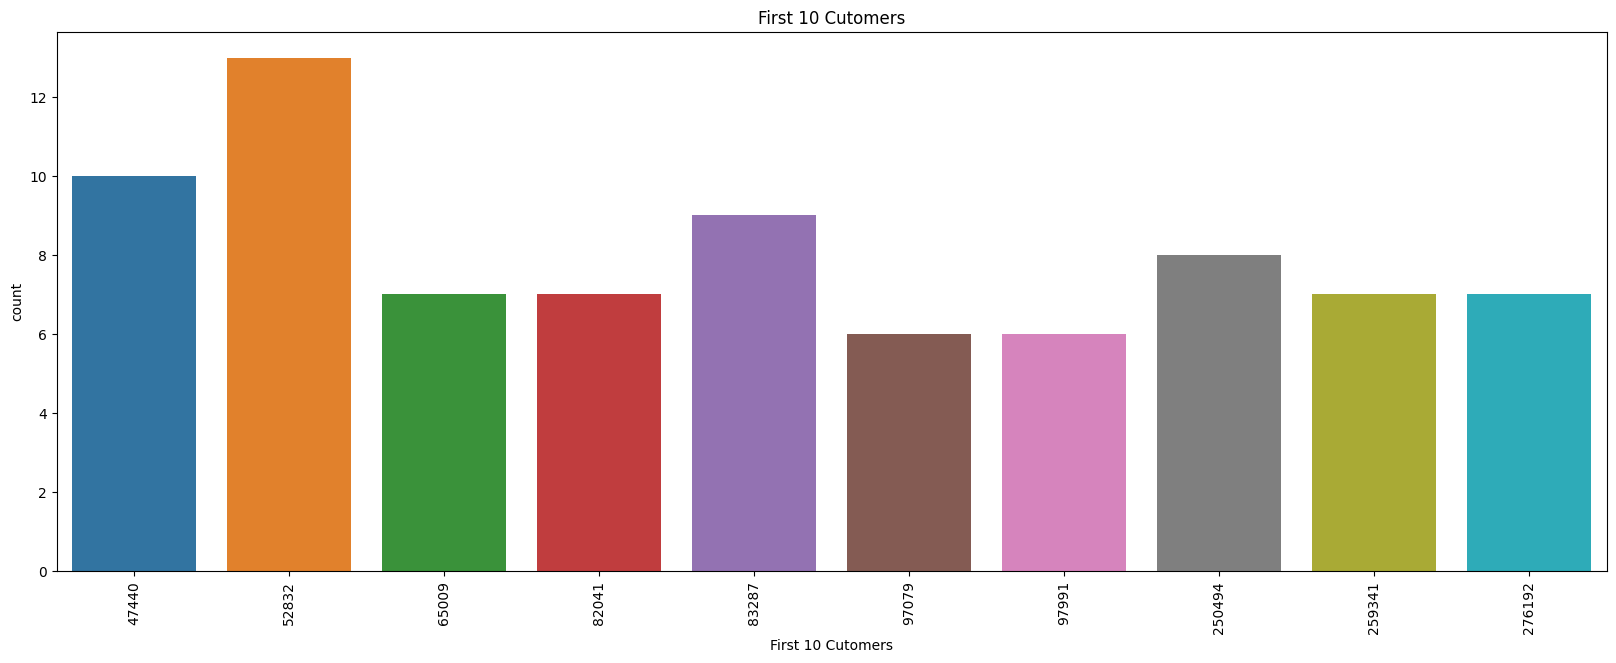

In [ ]:
# Plot the list of the first 10 customers
plt.figure(figsize=(20,7))
plt.title('First 10 Cutomers')
sns.countplot(data= df.loc[df['customer_id'].isin(first_10_customers)], x= "customer_id").set(xlabel='First 10 Cutomers')
plt.xticks(rotation=90);
plt.show();

#### Observations:
*   The number of unique customers in the dataset is 1,200.
*   The maximum order made by a customer is 13.
*   The number of orders placed by the first 10 customers is 80, 4.21% of the total orders.
*   The number of customers who ordered once is 784, 65.33%, and 41.31% of the total orders placed.

### **Exploration based on Restaurant Name:**

In [ ]:
# Check the occurrence of each restaurant with value_counts
restaurants = df['restaurant_name'].value_counts(sort=True)

# Total number of restaurants in the dataset
total_restaurants = restaurants.shape[0]

# Get the first 10 restaurants
first_10_restaurants = restaurants.index.to_list()[0:10]

# Calculate the sum of orders of the first 10 restaurants
sum_of_orders_first_10_restaurants = sum(restaurants.values[0:10])

# Get the number of restaurants that received one order
restaurants_received_one_order = len([x for x in restaurants.values if x == 1])

# Print results
print('The list of restaurants and the corresponding number of orders they received: \n',restaurants)
print('The total number of restaurants is ',total_restaurants)
print("The first 10 restaurants are : " + str(first_10_restaurants))
print('The total order received by the first 10 restaurants is {:d}, which is {:.2f}% of orders.'.format(sum_of_orders_first_10_restaurants,sum_of_orders_first_10_restaurants/total_orders*100))
print('The number of restaurants who received one order is {:d}, which is {:.2f}% of restaurants and {:.2f}% of orders placed.'.\
      format(restaurants_received_one_order,restaurants_received_one_order/total_customers*100,restaurants_received_one_order/total_orders*100))

The list of restaurants and the corresponding number of orders they received: 
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
The total number of restaurants is  178
The first 10 restaurants are : ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'TAO', 'Han Dynasty', 'Blue Ribbon Sushi Bar & Grill']
The total order received by the first 10 restaurants is 887, which is 46.73% of orders.
The number of restaurants who received one order is 50, which is 4.17% of restaurants and 2.63% of orders placed.


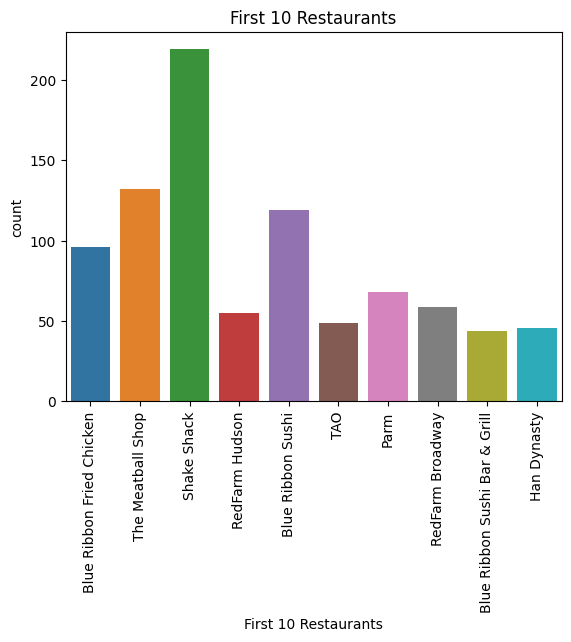

In [ ]:
# Plot the list of the first 10 restaurants
sns.countplot(data= df.loc[df['restaurant_name'].isin(first_10_restaurants)], x= "restaurant_name").set(title='First 10 Restaurants', xlabel='First 10 Restaurants');
plt.xticks(rotation=90);
plt.show();

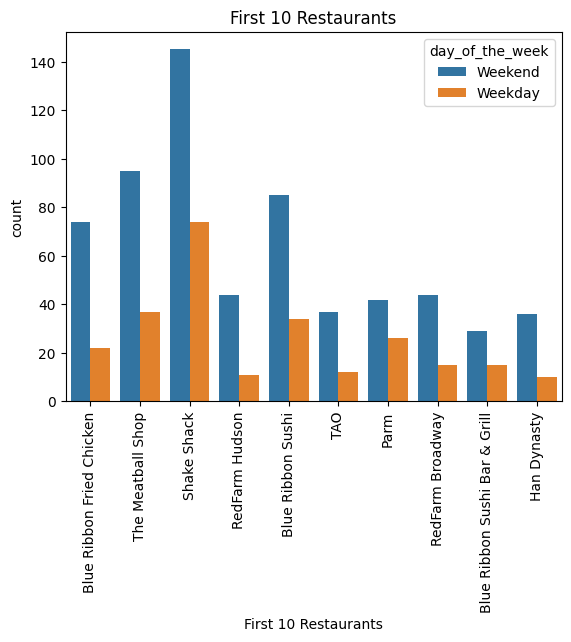

In [ ]:
# Plot the list of the first 10 restaurants based on the day_of_the week
sns.countplot(data= df.loc[df['restaurant_name'].isin(first_10_restaurants)], x= "restaurant_name", hue='day_of_the_week').set(title='First 10 Restaurants', xlabel='First 10 Restaurants');
plt.xticks(rotation=90);
plt.show();

#### Observations:
*   The total number of restaurants in the dataset is 178.
*   The first 10 restaurants received 887 orders, 46.73% of the total orders.
*   Shake Shack restaurant has the highest number of orders regardless of the day of the week.
*   Weekend is more popular for the first 10 restaurants observed than weekday.

### **Distribution based on Cuisine Type:**

In [ ]:
# Get the number of unique cuisine_type
unique_cuisine_type = df['cuisine_type'].nunique()
print (unique_cuisine_type)

# Calculate the sum of orders of all the cuisine types
sum_of_orders_cuisine_type = sum(restaurants.values)
print (sum_of_orders_cuisine_type)

14
1898


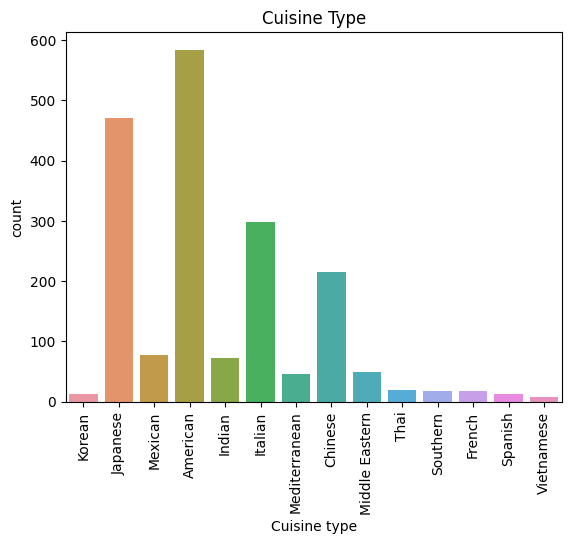

In [ ]:
# Plot the cuisine type
sns.countplot(data= df, x= "cuisine_type").set(title='Cuisine Type', xlabel='Cuisine type');
plt.xticks(rotation=90);
plt.show();

In [ ]:
df['cuisine_type'].value_counts(normalize=True)

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64

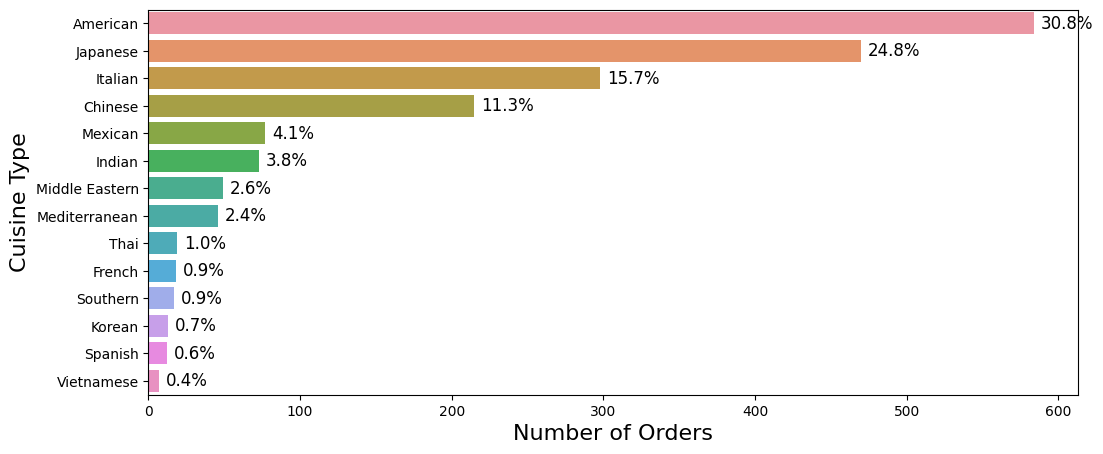

In [ ]:
# Use a countplot to explore distribution of different cuisine types
plt.figure(figsize = (12,5)) # set figure size
p1 = sns.countplot(y = df.cuisine_type, order = df.cuisine_type.value_counts().index)

p1.set_xlabel("Number of Orders", fontsize = 16)
p1.set_ylabel("Cuisine Type", fontsize = 16)

for p in p1.patches:
        label = "{:.1f}%".format(100.0*p.get_width() / df.cuisine_type.value_counts().sum())

        y = p.get_y() + p.get_height()/2
        x = p.get_width()

        p1.annotate(label,(x, y), ha="left", va="center", size=12, xytext=(5, 0), textcoords="offset points")

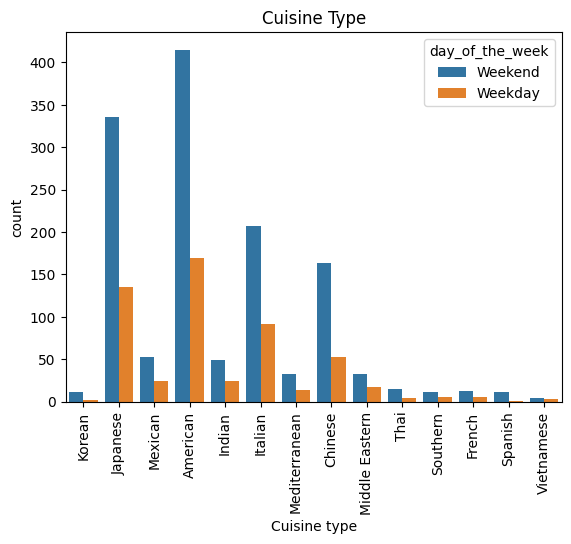

In [ ]:
# Check if the cuisine type preferences of the customers during the week
sns.countplot(data= df, x= "cuisine_type", hue='day_of_the_week').set(title='Cuisine Type', xlabel='Cuisine type');
plt.xticks(rotation=90);
plt.show();

#### Observations:
*   The total number of unique cuisine_type in the dataset is 14.
*   The most popular cuisine observed was American, constituting almost 31% of the orders received.
*   The least popular cuisine is Vietnamese, constituting only 0.4% of the total orders received.
*   Customers' cuisine_type preferences are not changed regardless of the day of the week.
*  Weekend is always more popular than weekday.

### **Exploration based on Cost of the Order:**

In [ ]:
# Make the statistical summary of the data handy
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


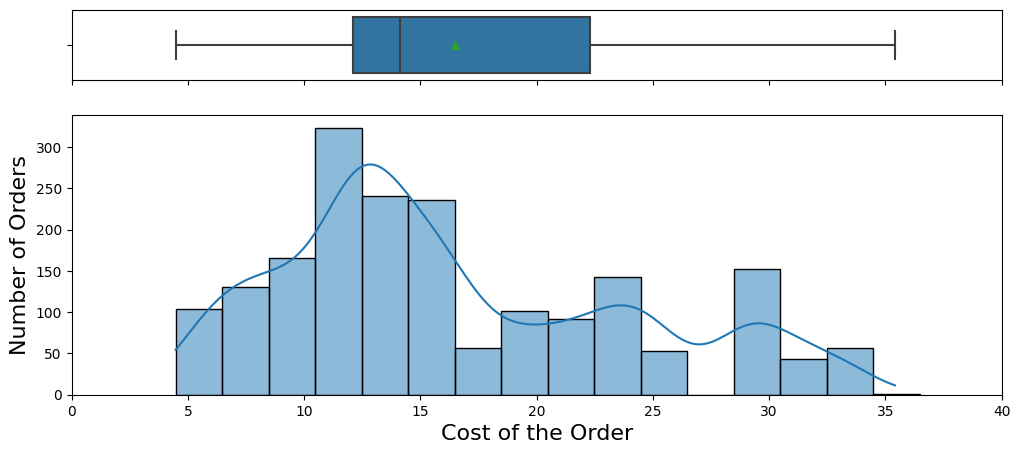

In [ ]:
# Use boxplot + histogram to explore distribution of cost_of_the_order
p2, (row1, row2) = plt.subplots(nrows = 2, ncols = 1, sharex = True,
                                gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (12,5))

# Create box plot on 1st row
sns.boxplot(ax = row1, x = df.cost_of_the_order, showmeans = True)

# Create histogram on 2nd row
sns.histplot(ax = row2, x = df.cost_of_the_order, kde = True, binwidth = 2)

row1.set_xlabel("", fontsize = 16)
row2.set_xlabel("Cost of the Order", fontsize = 16)
row2.set_ylabel("Number of Orders", fontsize = 16);
row2.set_xlim([0,40])
row2.set_xticks(range(0,41,5));

#### Observations:
*   The distribution is slightly right-skewed.
*   The average cost is 16.49 and median cost is 14.14, which explains the slight right skewness.
*   The cost of an order ranges from 4.47 to 35.41.
*   A significant portion of order costs are between ~10 and ~17.

### **Distribution based on Day of the Week:**

In [ ]:
# Get the unique values of the day_of_the_week
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

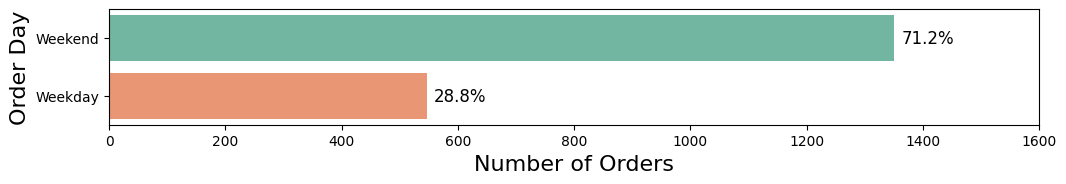

In [ ]:
# Use a countplot to explore distribution of different order days
plt.figure(figsize = (12,1.5))
p3 = sns.countplot(y = df.day_of_the_week, order = df.day_of_the_week.value_counts().index, palette = 'Set2')

p3.set_xlabel("Number of Orders", fontsize = 16)
p3.set_ylabel("Order Day", fontsize = 16)
p3.set_xlim([0,1600])

for p in p3.patches:
        label = "{:.1f}%".format(100.0*p.get_width() / df.cuisine_type.value_counts().sum())

        y = p.get_y() + p.get_height()/2
        x = p.get_width()

        p3.annotate(label,(x, y), ha="left", va="center", size=12, xytext=(5, 0), textcoords="offset points")

#### Observations:
*   The day_of_the_week only has two values: Weekday and Weekend.
*   A significant number of orders were placed during the weekend compared to weekdays. More than 71% of the orders are placed during the weekend.

### **Distribution based on Ratings:**

In [ ]:
# Get the unique values of the ratings
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

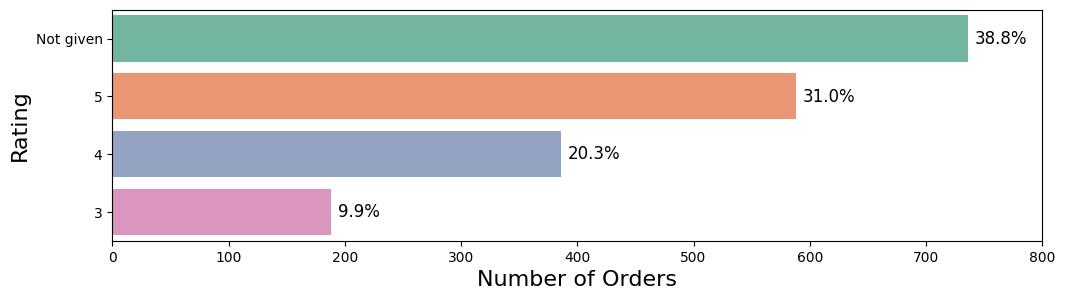

In [ ]:
# Use a countplot to explore distribution of the ratings
plt.figure(figsize = (12,3))
p4 = sns.countplot(y = df.rating, order = df.rating.value_counts().index, palette = 'Set2')

p4.set_xlabel("Number of Orders", fontsize = 16)
p4.set_ylabel("Rating", fontsize = 16)
p4.set_xlim([0,800])

for p in p4.patches:
        label = "{:.1f}%".format(100.0*p.get_width() / df.cuisine_type.value_counts().sum())

        y = p.get_y() + p.get_height()/2
        x = p.get_width()

        p4.annotate(label,(x, y), ha="left", va="center", size=12, xytext=(5, 0), textcoords="offset points")

#### Observations:
*   The customers have either rated 3, 4, or 5 on their order experience or have not given any rating.
*   None of the customers gave a rating of 1 or 2. However, orders which are not rated ('Not Given') is the most prevalent, almost 39%.
*  Among the ratings received, the highest is 5 (31%), followed by 4 (20.3%), and finally 3 (9.9%).
*  The majority of orders have a rating of 5, indicating high customer satisfaction.

### **Exploration based on Food Preparation Time:**

In [ ]:
# Make the statistical summary of the data handy
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# Get the unique values of the food_preparation_time
df.food_preparation_time.unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

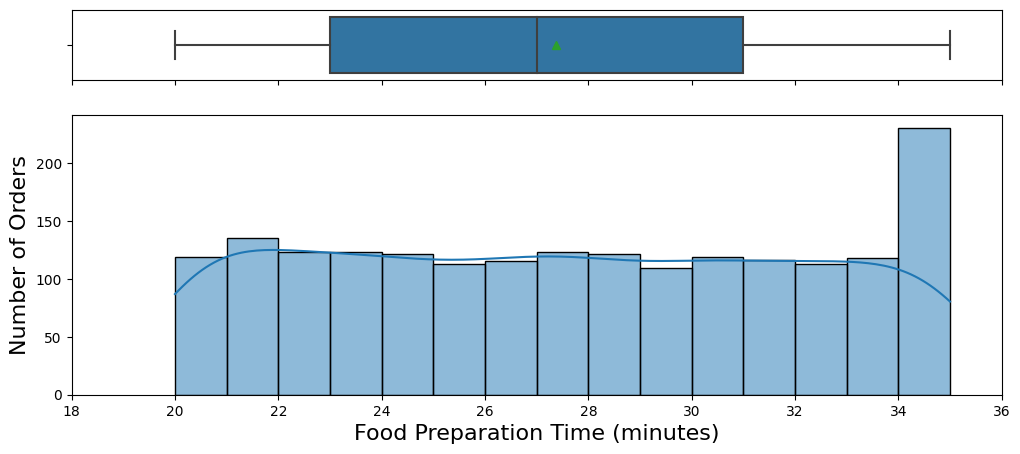

In [ ]:
# Use boxplot + histogram to explore distribution of the food preparation time
p5, (row1, row2) = plt.subplots(nrows = 2, ncols = 1, sharex = True,
                                gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (12,5))

# Create box plot on 1st row
sns.boxplot(ax = row1, x = df.food_preparation_time, showmeans = True)

# Create histogram on 2nd row
sns.histplot(ax = row2, x = df.food_preparation_time, kde = True, binwidth = 1)

row1.set_xlabel('', fontsize = 16)
row2.set_xlabel('Food Preparation Time (minutes)', fontsize = 16)
row2.set_ylabel('Number of Orders', fontsize = 16);
row2.set_xlim([18,36])
row2.set_xticks(range(18,37,2));

#### Observations:
*   The distribution is relatively uniform.
*   The average food preparation time is 27.37, and the median is 27, which explains the uniform distribution.
*   Each food preparation takes between 20 and 35 minutes.

### **Distribution based on Delivery Time:**

In [ ]:
# Make the statistical summary of the data handy
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# Get the unique values of the delivery_time
df.delivery_time.unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

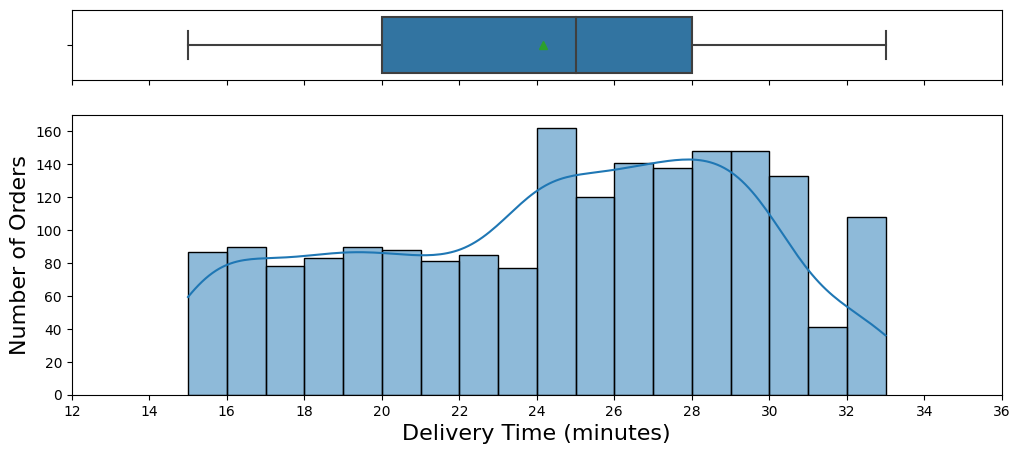

In [ ]:
# Use boxplot + histogram to explore distribution of delivery time
p6, (row1, row2) = plt.subplots(nrows = 2, ncols = 1, sharex = True,
                                gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (12,5))

# Create box plot on 1st row
sns.boxplot(ax = row1, x = df.delivery_time, showmeans = True)

# Create histogram on 2nd row
sns.histplot(ax = row2, x = df.delivery_time, kde = True, binwidth = 1)

row1.set_xlabel('', fontsize = 16)
row2.set_xlabel('Delivery Time (minutes)', fontsize = 16)
row2.set_ylabel('Number of Orders', fontsize = 16)
row2.set_xlim([12,36])
row2.set_xticks(range(12,37,2));

#### Observations:
*   The distribution is slightly left-skewed because of the small difference between the mean (24.16 minutes) and median (25 minutes).
*   Orders take between 15 to 33 minutes to be delivered.
*   A significant portion of orders take between 24 and 31 minutes.
*   There's a peak around 25 minutes, indicating that most orders are delivered within this time frame.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Use value_counts() to find the top five restaurant with most orders
df.restaurant_name.value_counts(sort=True)[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
# Get the top 5 restaurants
top5_restaurants = restaurants.index.to_list()[0:5]

# Calculate the sum of orders of the top 5 restaurants
sum_of_orders_top5_restaurants = sum(restaurants.values[0:10])

# Print results
print("The top 5 restaurants are : " + str(top5_restaurants ))
print('The total order received by the top 5 restaurants is {:d}, {:.2f}% of orders.'.format(sum_of_orders_top5_restaurants,sum_of_orders_top5_restaurants/total_orders*100))

The top 5 restaurants are : ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']
The total order received by the top 5 restaurants is 887, 46.73% of orders.


#### Observations:

*   The top 5 restaurants in terms of the number of orders received are:
1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm

*   The top 5 restaurants are responsible for almost 47% of the orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Use Pandas DataFrame methods
cuisine_weekend = df.cuisine_type[df.day_of_the_week == 'Weekend']
cuisine_weekend.value_counts(sort = True)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

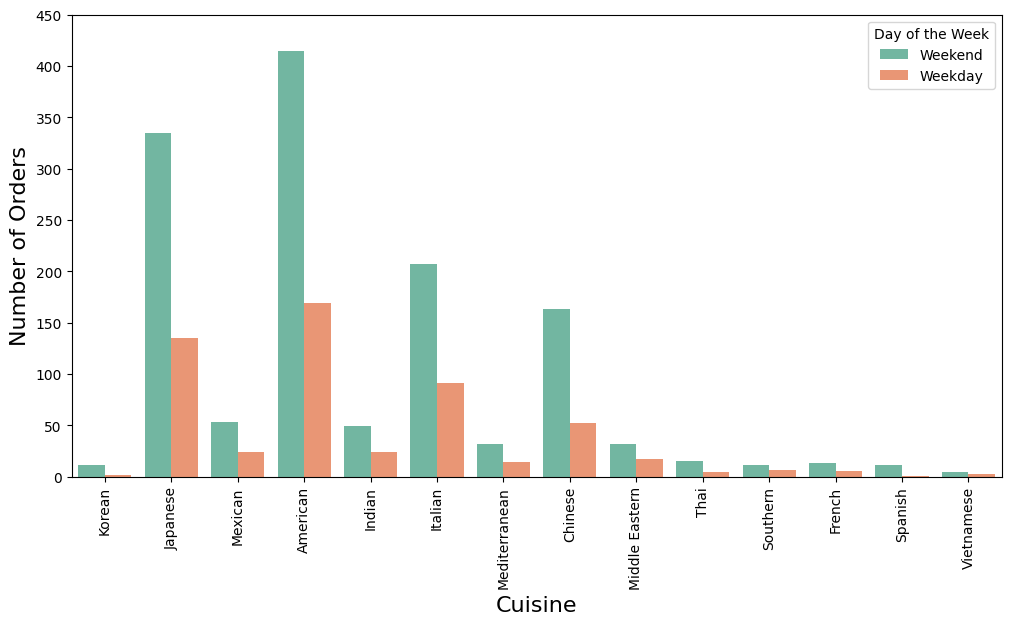

In [ ]:
# Check the most popular cuisine on weekends
plt.figure(figsize = (12,6))
p7 = sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', palette = 'Set2')

# Create a countplot with grouped bars
p7.set_xticklabels(p7.get_xticklabels(),rotation = 90)
p7.set_xlabel("Cuisine", fontsize = 16)
p7.set_ylabel("Number of Orders", fontsize = 16)
p7.set_ylim([0,450])
p7.legend(title='Day of the Week');

#### Observations:
*   The most popular cuisine on weekends is American, with 415 orders.
*   American cuisine type is also the top favorite during weekdays. Therefore, customers' cuisine_type preferences are unchanged regardless of weekends or weekdays.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Check the number of orders that have more than 20 dollars and divide it by total_orders to get the percentage
# Total_orders is calculated previously total_orders = df.shape[0]
df.loc[df['cost_of_the_order'] > 20].shape[0]/total_orders * 100

29.24130663856691

#### Observations:
*   The percentage of orders that cost more than 20 dollars is 29.24%.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean order delivery time
df['delivery_time'].mean()

24.161749209694417

In [ ]:
# Validate the mean oder delivery time using describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
*   The mean order delivery time is 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Use value_counts() to get the top 3 most frequent customers in an ascending order
df.customer_id.value_counts(sort = True)[0:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
*   The top 3 most frequent customers are:
1.   Customer ID: 52832 - 13 orders
2.   Customer ID: 47440 - 10 orders
3.   Customer ID: 83287 - 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Explore relationships between the following variables in the dataset:**
*   cost: Cost of the order
*   food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food
*   delivery_time: Time (in minutes) taken by the delivery person to deliver the food package
*   rating: Rating given by the customer out of 5; Note that rating will be considered as a categorical variable when relations between numerical and categorical variables are explored

Additionally, we can introduce a new variable
*   total_time: Time (in minutes) to fulfill the order, which is the of sum food_preparation_time + delivery_time


In [ ]:
# Add total_time column to the DataFrame
df['total_time'] = df.food_preparation_time + df.delivery_time # compute the total time to fulfill an order

# Show a sample row to ensure the total_time is added
df.sample()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
584,1476741,318095,Blue Ribbon Sushi Izakaya,Japanese,6.79,Weekend,5,32,30,62


### **Explore correlations between numerical variables:**

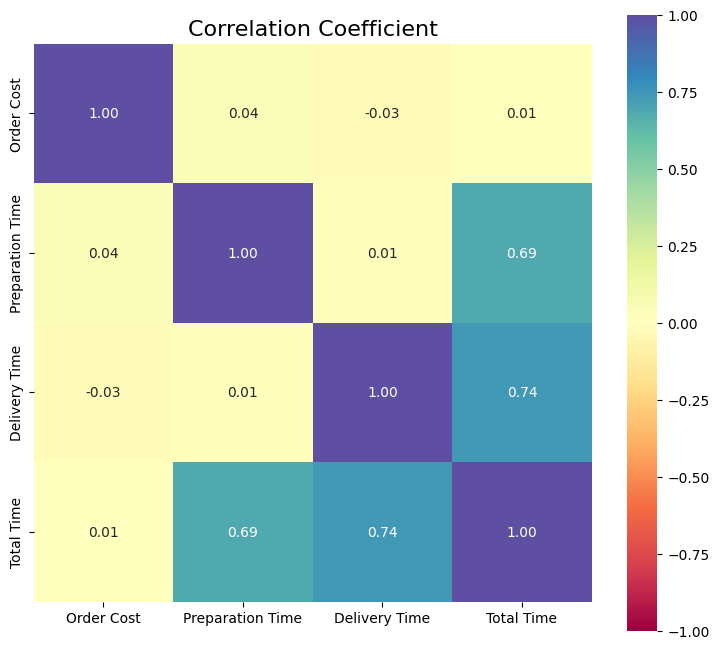

In [ ]:
# Compute correlation coefficients
rhos = df[['cost_of_the_order','food_preparation_time','delivery_time','total_time']].corr()

plt.figure(figsize = (9,8))
ticklabels = ['Order Cost','Preparation Time','Delivery Time','Total Time']

# Use heatmap, show the correlation coefficients
p8 = sns.heatmap(rhos, annot=True, square = True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
            xticklabels = ticklabels, yticklabels = ticklabels)
p8.set_title('Correlation Coefficient',fontsize = 16);

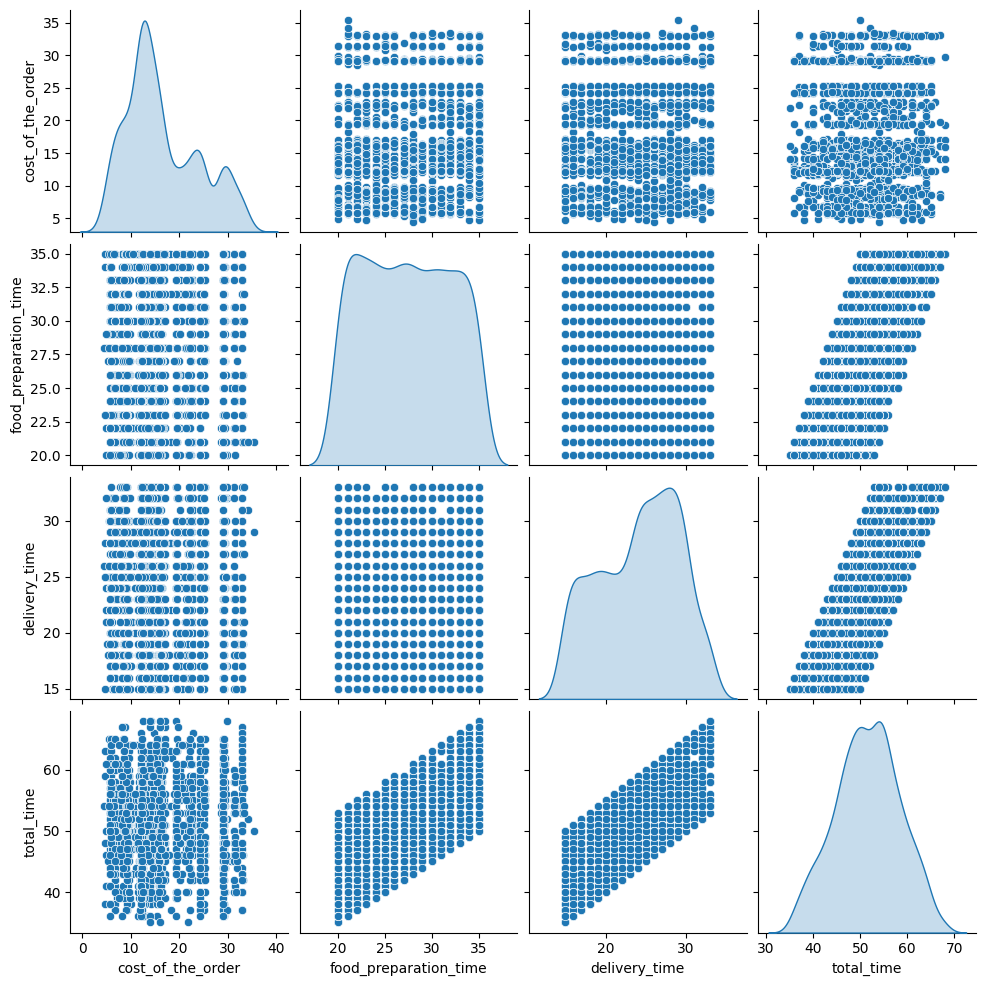

In [ ]:
# In addition to heatmap, a pairplot could be helpful to identify any potential correlations
sns.pairplot(data = df[['cost_of_the_order','food_preparation_time','delivery_time','total_time']], diag_kind="kde",
            aspect = 1);

#### Observations:
*   No significant correlation exists between the original numerical variables, i.e., Cost of the Order, Food Preparation Time, and Delivery Time. This means an increase or a decrease in one of these variables will not affect the other variables.
*   The new variable Total Time is insignificantly correlated to the Cost of the Order.
*   As expected, Total Time, which is the sum food_preparation_time + delivery_time, significantly correlates with Food Preparation and Delivery Time, 0.69 and 0.74, respectively.

### **Explore correlations of numerical variables with rating:**

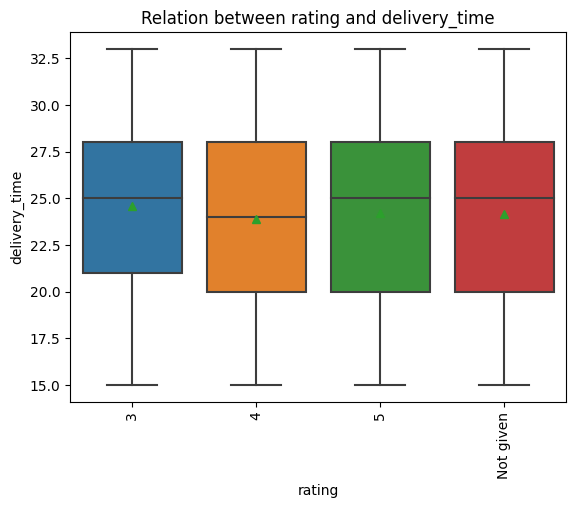

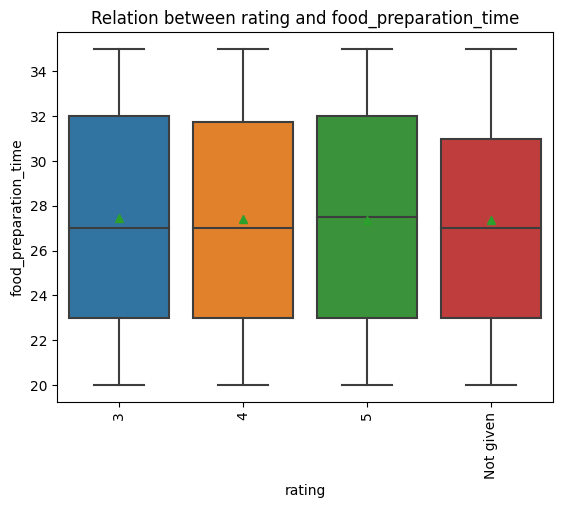

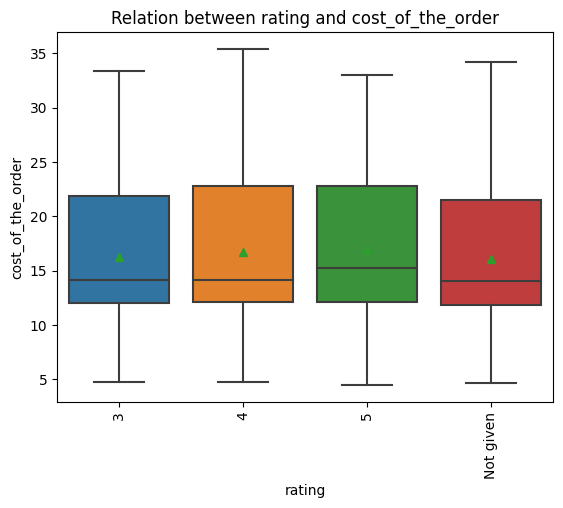

In [ ]:
# Create a new data sorted by rating
data=df.sort_values('rating')

# Plot the relation between rating and delivery_time
sns.boxplot(data=data, x='rating', y='delivery_time', showmeans=True)\
.set(title='Relation between rating and delivery_time')
plt.xticks(rotation=90);
plt.show();

# Plot the relation between rating and food_preparation_time
sns.boxplot(data=data, x='rating', y='food_preparation_time', showmeans=True)\
.set(title='Relation between rating and food_preparation_time')
plt.xticks(rotation=90);
plt.show();

# Plot the relation between rating and cost_of_the_order
sns.boxplot(data=data, x='rating', y='cost_of_the_order', showmeans=True)\
.set(title='Relation between rating and cost_of_the_order')
plt.xticks(rotation=90);
plt.show();

<ipython-input-45-feb65465db7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_rating.rating = df_numeric_rating.rating.astype('int') # change Rating data type to integer


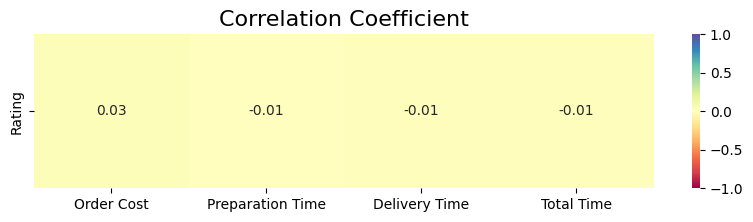

In [ ]:
# Consider Rating, but after removing the DataFrame rows with no rating ('Not given')
df_numeric_rating = df[df.rating != 'Not given'] # DataFrame without rows of 'Not given' rating
df_numeric_rating.rating = df_numeric_rating.rating.astype('int') # change Rating data type to integer

# Compute correlation coefficients
rhos_rating = df_numeric_rating[['rating','cost_of_the_order','food_preparation_time','delivery_time','total_time']].corr()

plt.figure(figsize = (10,2)) # set figure size
ticklabels = ['Order Cost','Preparation Time','Delivery Time','Total Time'] # x-axis tick labels

# Create heatmap with correlation coefficients
p9 = sns.heatmap(
    pd.DataFrame(rhos_rating.loc['rating',['cost_of_the_order','food_preparation_time','delivery_time','total_time']]).T,
    annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
    xticklabels = ticklabels, yticklabels = ['Rating']
)
p9.set_title('Correlation Coefficient',fontsize = 16); # set chart's title


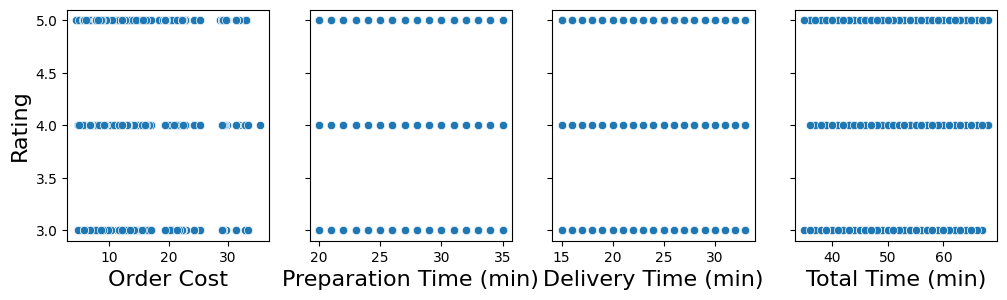

In [ ]:
# In addition to heatmap, scatterplots could be helpful to identify any potential correlations

# Create subplots of four columns and one row
p10, (col1, col2, col3, col4) = plt.subplots(nrows = 1, ncols = 4, sharey = True,
                                gridspec_kw={"width_ratios": (0.25, 0.25, 0.25, 0.25)}, figsize = (12,3))

# Create a scatterplot on 1st column
sns.scatterplot(ax = col1, data = df_numeric_rating, x = 'cost_of_the_order', y = 'rating')
col1.set_xlabel('Order Cost', fontsize = 16) # set x-axis label
col1.set_ylabel('Rating', fontsize = 16) # set y-axis label

# Create a scatterplot on 2nd column
sns.scatterplot(ax = col2, data = df_numeric_rating, x = 'food_preparation_time', y = 'rating')
col2.set_xlabel('Preparation Time (min)', fontsize = 16) # set x-axis label

# Create a scatterplot on 3rd column
sns.scatterplot(ax = col3, data = df_numeric_rating, x = 'delivery_time', y = 'rating');
col3.set_xlabel('Delivery Time (min)', fontsize = 16) # set x-axis label

# Create a scatterplot on 4th column
sns.scatterplot(ax = col4, data = df_numeric_rating, x = 'total_time', y = 'rating');
col4.set_xlabel('Total Time (min)', fontsize = 16); # set x-axis label


#### Observations:
*   No significant correlation was observed between the rating and the selected numerical variables. This means that the customer ratings are not linearly related to the Cost of the Order, Food Preparation Time, and Delivery Time.

### **Explore correlations between numerical and categorical variables:**

Customer IDs are declared as an integer in the original dataset. But they can be considered as categorical variables, as the ID numbers are not actually of numerical value.

### **Customer as it relates to the Cost of the Order:**

In [ ]:
# Use groupby() to group orders based on Customer IDs
df_customer = df.groupby(by = 'customer_id')

# Compute and sort mean costs of orders for each customer
df_customer.cost_of_the_order.mean().sort_values(ascending = False)

customer_id
116992    33.32
123780    33.03
304587    33.03
125510    33.03
141496    33.03
          ...  
64754      5.34
339144     5.05
318665     4.90
50123      4.85
133617     4.75
Name: cost_of_the_order, Length: 1200, dtype: float64

#### Observations:
*   The highest and lowest average costs are for the orders placed by the customers with the IDs 116992 and 133617, respectively.



In [ ]:
# Compute and sort minimum costs of orders for each customer
df_customer.cost_of_the_order.min().sort_values(ascending = False)

customer_id
116992    33.32
357761    33.03
212469    33.03
148327    33.03
125510    33.03
          ...  
145389     4.75
133617     4.75
270444     4.71
53289      4.66
52327      4.47
Name: cost_of_the_order, Length: 1200, dtype: float64

#### Observations:
*   The highest and lowest minimum costs are for the orders placed by the customers with IDs 116992 and 52327, respectively.

In [ ]:
# Compute and sort maximum costs of orders for each customer
df_customer.cost_of_the_order.max().sort_values(ascending = False)

customer_id
62359     35.41
231061    34.19
60039     33.37
275689    33.37
116992    33.32
          ...  
64754      5.34
339144     5.05
318665     4.90
50123      4.85
133617     4.75
Name: cost_of_the_order, Length: 1200, dtype: float64

#### Observations:
*   The highest and lowest maximum costs are for the orders placed by the customers with IDs 62359 and 133617, respectively.

### **Customer as it relates to the Cuisine Type:**

In [ ]:
# Use nunique() to count number of unique cuisine types for each customer
customer_cuisine_number = df_customer.cuisine_type.nunique()

# Use value_counts() to count different numbers of cuisine types chosen by customers
customer_cuisine_number_dist = customer_cuisine_number.value_counts()

# Display cuisine number (1st column) and number of customers (2nd column)
customer_cuisine_number_dist

1    1059
2     118
3      20
4       2
8       1
Name: cuisine_type, dtype: int64

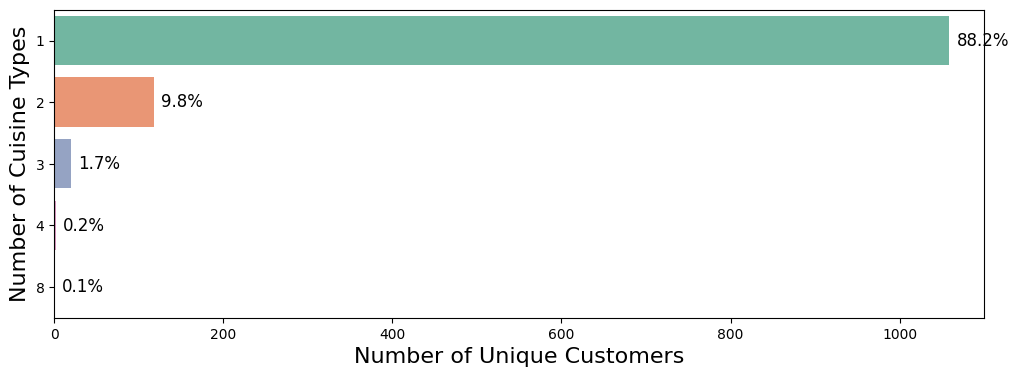

In [ ]:
# Use barplot to show the results
plt.figure(figsize = (12,4))
p11 = sns.barplot(y = customer_cuisine_number_dist.index, x = customer_cuisine_number_dist, orient = 'h', palette = 'Set2')

# Create barplot
p11.set_xlabel('Number of Unique Customers', fontsize = 16)
p11.set_ylabel('Number of Cuisine Types', fontsize = 16)
p11.set_xlim([0,1100])

for p in p11.patches:
        label = "{:.1f}%".format(100.0*p.get_width() / customer_cuisine_number_dist.sum())

        y = p.get_y() + p.get_height()/2
        x = p.get_width()

        p11.annotate(label,(x, y), ha="left", va="center", size=12, xytext=(5, 0), textcoords="offset points")

#### Observations:
*   Clearly, most customers (> 88%) order foods of only one type of cuisine.
*   Only ~10% of customers order food from two cuisine types, ~2% of customers order food from three cuisine types, and less than 1% of customers order food from more than three different cuisine types.

### **Customer as it relates to the Restaurant:**

In [ ]:
# Use groupby() to group orders based on restaurant name
df_restaurant = df.groupby('restaurant_name')

# Use nunique() to count number of unique customers for each restaurant
restaurant_customer_number = df_restaurant.customer_id.nunique()

# Show number of unique customers of restaurants in a descending order
restaurant_customer_number.sort_values(ascending = False)

restaurant_name
Shake Shack                  170
The Meatball Shop            102
Blue Ribbon Sushi             75
Blue Ribbon Fried Chicken     68
Parm                          56
                            ... 
Hot Kitchen                    1
Hiroko's Place                 1
Hibino                         1
Haveli Indian Restaurant       1
Lamarca Pasta                  1
Name: customer_id, Length: 178, dtype: int64

#### Observations:
*   The restaurant 'Shake Shack' has the most significant number of unique customers, i.e., 170 out of 1,200 customers in the data. It is followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, with 102, 75, 68, and 56 unique customers.
*   Hot Kitchen, Hiroko's Place, Hibino, Haveli Indian Restaurant, and Lamarca Pasta have one unique customer out of 1,200 existing data.

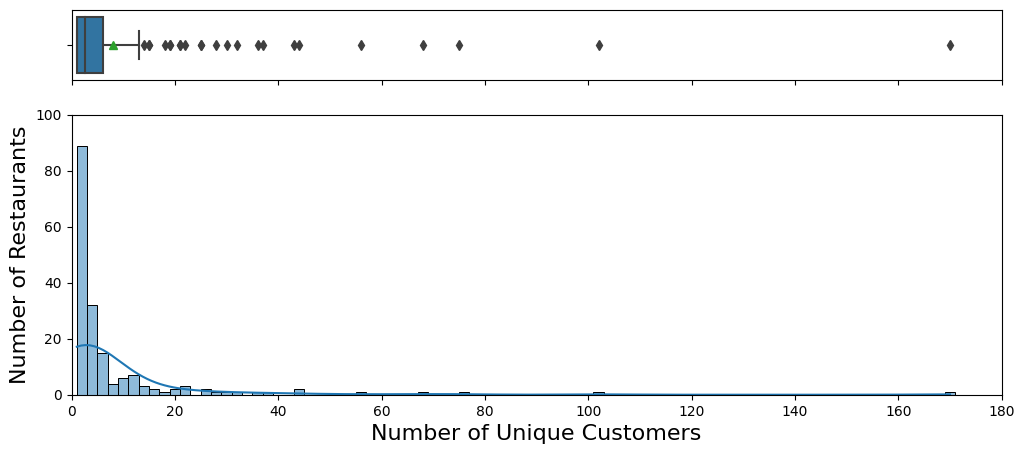

In [ ]:
# Use boxplot + histogram to explore distribution of restaurants' unique customer numbers
p12, (row1, row2) = plt.subplots(nrows = 2, ncols = 1, sharex = True,
                                gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (12,5))

# Create box plot on 1st row
sns.boxplot(ax = row1, x = restaurant_customer_number, showmeans = True)

# Create histogram on 2nd row
sns.histplot(ax = row2, x = restaurant_customer_number, kde = True, binwidth = 2)

row1.set_xlabel('', fontsize = 16)
row2.set_xlabel('Number of Unique Customers', fontsize = 16)
row2.set_ylabel('Number of Restaurants', fontsize = 16);
row2.set_xlim([0,180])
row2.set_ylim([0,100]);

#### Observations:
*   The outliers on the right side (higher values) contributed to the right skewness.
*   Due to the large number of customers observed as outliers, it might be necessary to investigate the cause of these outliers. They could be due to data entry errors or significant, real-world occurrences.

### **Restaurant as it relates to the Cuisine Type:**

In [ ]:
# Use groupby() to group orders based on cuisine type
df_cuisine = df.groupby('cuisine_type')

# Use nunique() to count number of unique restaurants of each cuisine type and sort them via sort_values()
cuisine_restaurant_number = df_cuisine.restaurant_name.nunique().sort_values(ascending = False)

# Show counts of restaurants of each cuisine type
cuisine_restaurant_number

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64

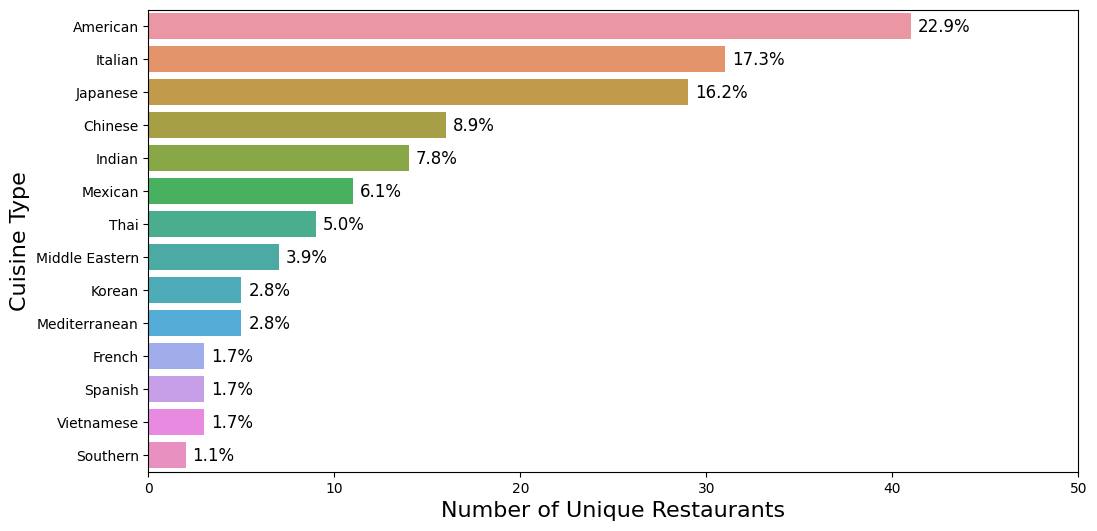

In [ ]:
# Display results through a barplot
plt.figure(figsize = (12,6))

# create barplot
p13 = sns.barplot(y = cuisine_restaurant_number.index, x = cuisine_restaurant_number, order = cuisine_restaurant_number.index)
p13.set_xlabel('Number of Unique Restaurants', fontsize = 16)
p13.set_ylabel('Cuisine Type', fontsize = 16)
p13.set_xlim([0,50])

for p in p13.patches:
        label = "{:.1f}%".format(100.0*p.get_width() / cuisine_restaurant_number.sum())

        y = p.get_y() + p.get_height()/2
        x = p.get_width()

        p13.annotate(label,(x, y), ha="left", va="center", size=12, xytext=(5, 0), textcoords="offset points")

#### Observations:
*   In the data, American cuisine dominates with about 23% of restaurants, followed by Italian at 17% and Japanese at 16%.
*   The cuisine with the least number of restaurants (~1%) is Southern.

### **Restaurant as it relates to the Cost of the Order:**

In [ ]:
# Group cost of the order data based on restaurant name
df_restaurant_cost = df.groupby('restaurant_name')['cost_of_the_order']

# Compute and sort mean cost of the order for each restaurant
df_restaurant_cost.mean().sort_values(ascending = False)

restaurant_name
Kambi Ramen House             32.930
Emporio                       31.430
Bhatti Indian Grill           31.115
Haru Gramercy Park            29.830
Lucky Strike                  29.250
                               ...  
Market Table                   6.790
Wa Jeal                        6.740
Cipriani Le Specialita         5.920
Big Wong Restaurant _¤¾Ñ¼     5.920
Hunan Manor                    5.720
Name: cost_of_the_order, Length: 178, dtype: float64

#### Observations:
*   'Kambi Ramen House' has the highest cost of the order at 32.93, suggesting it might be among the priciest dining options in this dataset.
*   Restaurants like 'Hunan Manor' and 'Big Wong Restaurant' have lower costs around 5.72 and 5.92, respectively, indicating more affordable options for diners.

### **Restaurant as it relates to the Food Preparation Time:**

In [ ]:
# Group food preparation time data based on restaurant name
df_restaurant_time = df.groupby('restaurant_name')['food_preparation_time']

# Compute and sort mean food preparation time of orders for each restaurant - show top 5 values
df_restaurant_time.mean().sort_values(ascending = False)[0:5]

restaurant_name
Cipriani Le Specialita    35.0
Sushi Choshi              35.0
Kambi Ramen House         35.0
Klong                     35.0
Taro Sushi                35.0
Name: food_preparation_time, dtype: float64

In [ ]:
# Compute and sort mean food preparation time of orders for each restaurant - show bottom 5 values
df_restaurant_time.mean().sort_values(ascending = True)[0:5]

restaurant_name
Haru Gramercy Park    20.0
67 Burger             20.0
Frank Restaurant      20.0
DespaÌ±a              20.5
Sarabeth's West       21.0
Name: food_preparation_time, dtype: float64

#### Observations:
*   'Cipriani Le Specialita,' 'Sushi Choshi,' 'Kambi Ramen House,' 'Klong,' and 'Taro Sushi' share the longest average food preparation time of 35.0 minutes, indicating they may prioritize quality and detail in their dishes. Or it could be a real-world problem of staff shortage for these restaurants.
*   The uniformity in preparation time among the top five suggests a standard for certain cuisines or dining experiences in the dataset.
*   Conversely, 'Haru Gramercy Park,' '67 Burger,' 'Frank Restaurant,' and 'DespaÌ±a' have shorter average food preparation times, ranging from 20.0 to 20.5 minutes, indicating quicker service or simpler dishes. 'Sarabeth's West' is slightly higher at 21.0 minutes.

### **Restaurant as it relates to the Rating:**

In [ ]:
# Calculate percentage of restaurants that have not been given any rating
restaurant_w_rating_number = df[df.rating != 'Not given'].restaurant_name.nunique()

# Use nunique() to find number of unique restaurants that have been given a rating
restaurant_total_number = df.restaurant_name.nunique()

# Calculate and print percentage
print('Restaurants without Rating: ', round(100*(1.0-restaurant_w_rating_number/restaurant_total_number),1), '%', sep = '')

Restaurants without Rating: 12.4%


#### Observations:
*   12.4% of the restaurants in the dataset have not been given any rating, indicating a significant portion yet to receive customer feedback or are relatively new in the market.

In [ ]:
# Find the restaurants with lowest and highest ratings (excluding those that have not been rated at all)
restaurant_mean_rating = df_numeric_rating.groupby('restaurant_name').rating.mean().sort_values(ascending = False).dropna()

# Show statistical summary of mean rating
restaurant_mean_rating.describe()

count    156.000000
mean       4.397807
std        0.552062
min        3.000000
25%        4.000000
50%        4.425725
75%        5.000000
max        5.000000
Name: rating, dtype: float64

#### Observations:
*   The average rating across the 156 rated restaurants is approximately 4.4, with a standard deviation of 0.552, indicating that most restaurants in the dataset are rated favorably.
*   Ratings span from a low of 3.0 to a perfect 5.0, with half of the restaurants achieving a rating of 4.43 or higher, showcasing overall customer satisfaction.

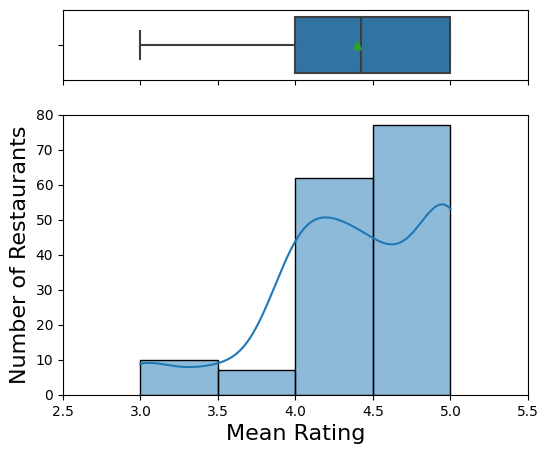

In [ ]:
# Use boxplot + histogram to explore distribution of restaurants' mean ratings

p14, (row1, row2) = plt.subplots(nrows = 2, ncols = 1, sharex = True,
                                gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (6,5))

# Create subplots of two rows and one column
sns.boxplot(ax = row1, x = restaurant_mean_rating, showmeans = True)
sns.histplot(ax = row2, x = restaurant_mean_rating, kde = True, binwidth = 0.5)

row1.set_xlabel('', fontsize = 16)
row2.set_xlabel('Mean Rating', fontsize = 16)
row2.set_ylabel('Number of Restaurants', fontsize = 16);
row2.set_xlim([2.5,5.5])
row2.set_ylim([0,80]);

#### Observations:
*   Ratings span from a low of 3.0 to a perfect 5.0, with 75% of the restaurants achieving a rating of 4.0 and above, showcasing overall customer satisfaction.

### **Cost of the Order as it relates to the Food Preparation Time:**

<Figure size 1200x800 with 0 Axes>

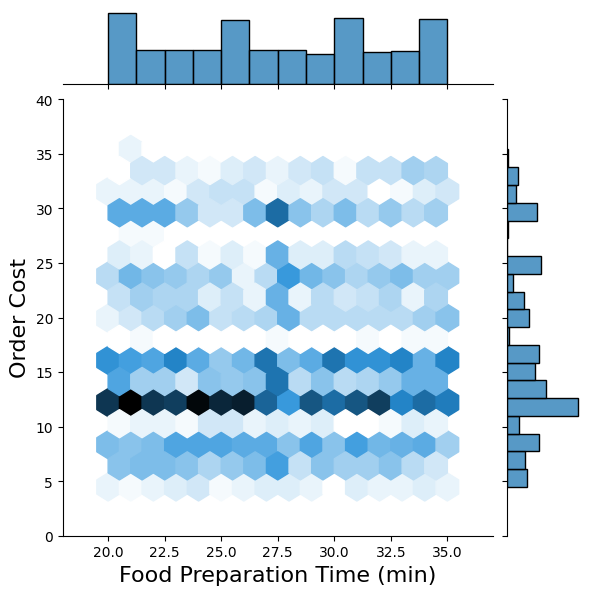

In [ ]:
# Examine potential relationships between cost of the order and food preparation time
plt.figure(figsize = (12,8));

# Create a joint plot
sns.jointplot(data = df, x = 'food_preparation_time', y = 'cost_of_the_order', kind = 'hex');

plt.xlabel('Food Preparation Time (min)', fontsize = 16);
plt.ylabel('Order Cost', fontsize = 16);
plt.xlim([18,37]);
plt.ylim([0,40]);

#### Observations:
*   There's no distinct trend between the cost of the order and food preparation time; however, there's a notable concentration of orders costing between 11-17 regardless of preparation duration. This suggests that there might be a specific range of food preparation time and cost that is more prevalent or preferred among the restaurants in the dataset.

### **Cost of the Order as it relates to the Delivery Time:**

<Figure size 1200x800 with 0 Axes>

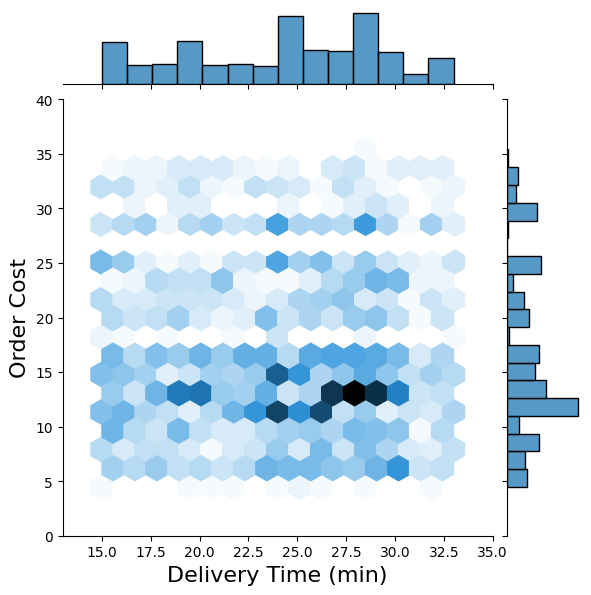

In [ ]:
# Examine potential relationships between cost of the order and delivery time
plt.figure(figsize = (12,8));

# Create joint plot
sns.jointplot(data = df, x = 'delivery_time', y = 'cost_of_the_order', kind = 'hex');

plt.xlabel('Delivery Time (min)', fontsize = 16);
plt.ylabel('Order Cost', fontsize = 16);
plt.xlim([13,35]);
plt.ylim([0,40]);

#### Observations:
*   There's no distinct trend between the cost of the order and delivery time.

### **Cost of the Order as it relates to the Rating:**

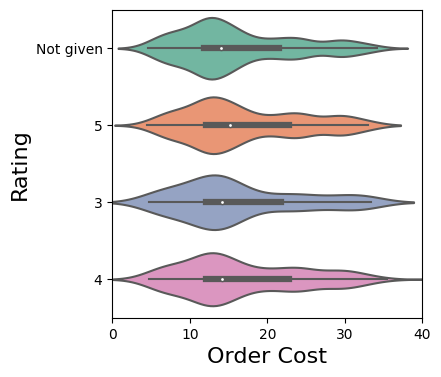

In [ ]:
# Examine potential relationships between cost of the order and rating
plt.figure(figsize = (4,4));

# Create violin plot
sns.violinplot(data = df, x = 'cost_of_the_order', y = 'rating', palette = 'Set2')

plt.xlabel('Order Cost', fontsize = 16);
plt.ylabel('Rating', fontsize = 16);
plt.xlim([0,40]);

#### Observations:
*   The violin plot suggests a distribution of ratings across various order costs, with wider sections indicating more frequent rating values; however, there isn't a consistent pattern to infer a direct relationship between order cost and ratings.
*   Order cost doesn't seem to influence ratings, as all ratings are distributed across similar cost ranges.

### **Cuisine Type as it relates to the Customers:**

In [ ]:
# Use nunique() to count number of unique customers for each cuisine type and sort them via sort_values()
cuisine_customer_number = df_cuisine.customer_id.nunique().sort_values(ascending = False)

# Show counts of customers for each cuisine type
cuisine_customer_number

cuisine_type
American          417
Japanese          304
Italian           233
Chinese           162
Mexican            63
Indian             54
Mediterranean      37
Middle Eastern     37
Thai               15
French             13
Southern           12
Korean             11
Spanish             8
Vietnamese          5
Name: customer_id, dtype: int64

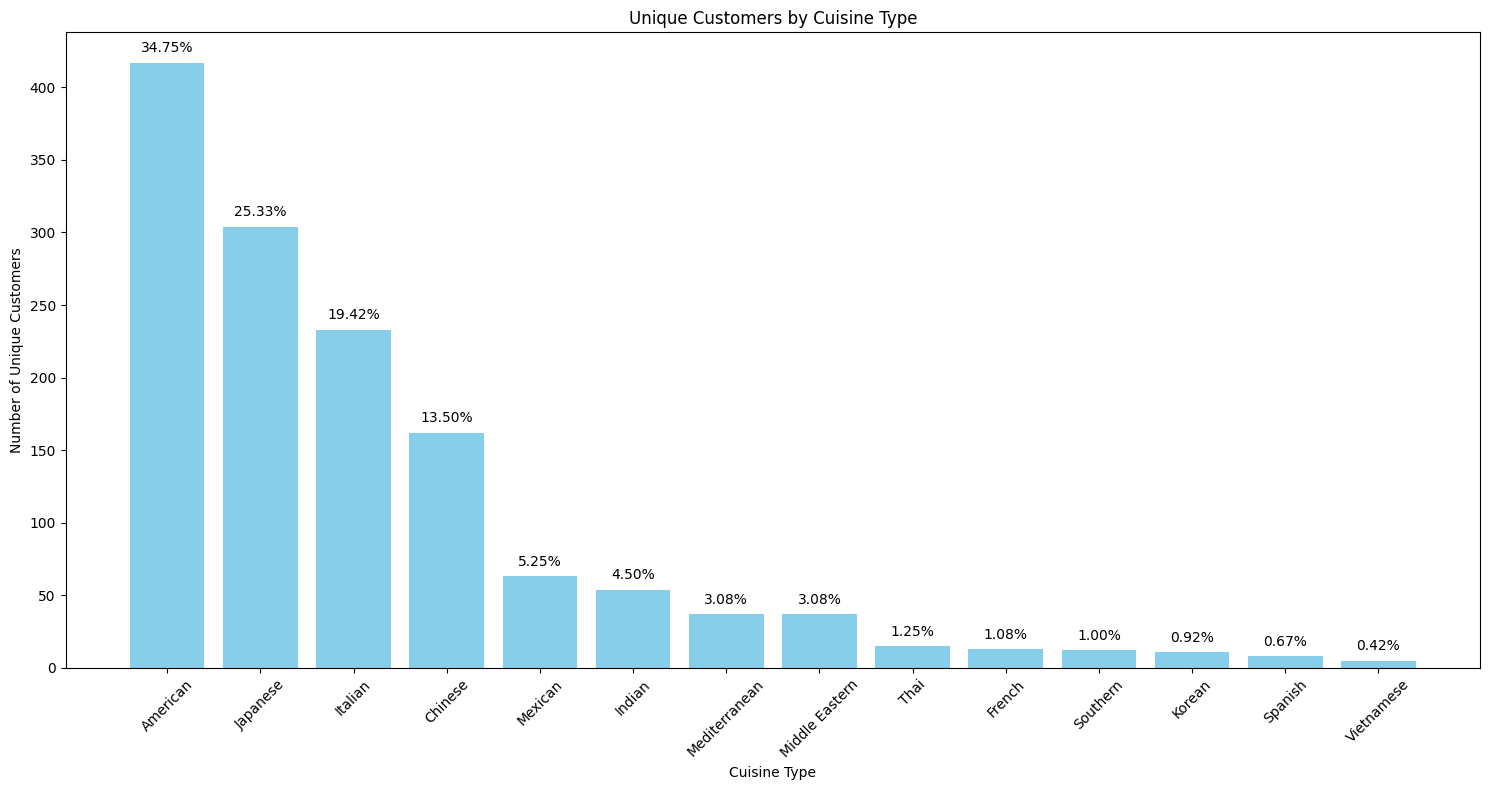

In [ ]:
# Grouping by cuisine type and counting unique customers
unique_customers_by_cuisine = df.groupby('cuisine_type')['customer_id'].nunique().sort_values(ascending=False)

# Calculate the total number of unique customers
total_unique_customers = df['customer_id'].nunique()

# Plotting the data
plt.figure(figsize=(15, 8))
bars = plt.bar(unique_customers_by_cuisine.index, unique_customers_by_cuisine.values, color='skyblue')

# Adding percentage labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{(yval/total_unique_customers)*100:.2f}%', ha='center', va='bottom')

plt.title('Unique Customers by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
*   American cuisine is the most popular among customers, boasting a significant 417 (34.75%) unique customers, followed by Japanese and Italian with 304 (25.33%) and 233 (19.42%) customers, respectively.
*   In contrast, cuisines like French, Southern, Korean, Spanish, and Vietnamese have fewer unique customers, with 1% or less of the customers highlighting a difference in popularity or availability.

### **Cuisine Type as it relates to the Cost of the Order:**

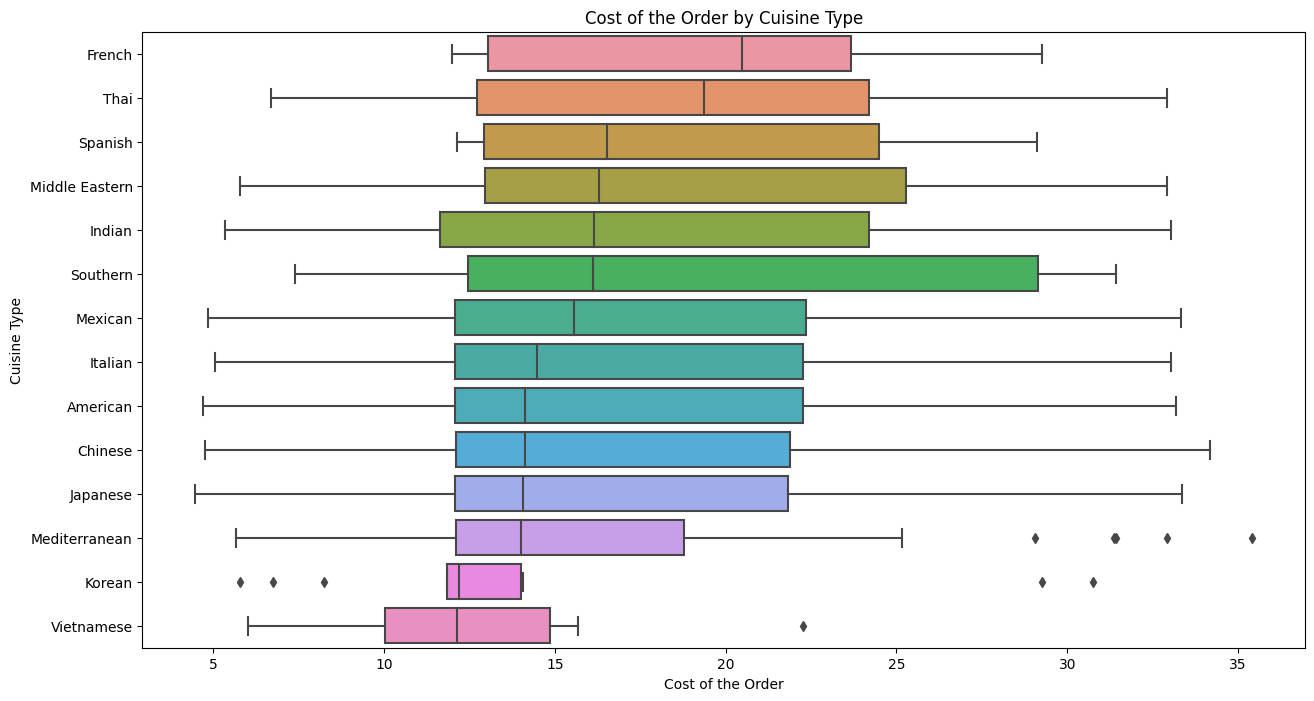

In [ ]:
# Examine potential relationships between cuisine type and cost of the order
# Set the figure size
plt.figure(figsize=(15, 8))

# Create the box plot
sns.boxplot(data = df, y='cuisine_type', x='cost_of_the_order',
            order = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False).index)

# Set the title and axis labels
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cost of the Order')
plt.ylabel('Cuisine Type')

# Display the plot
plt.show()

#### Observations:
*   Japanese cuisine tends to have a higher median cost compared to other cuisines. The interquartile range (IQR) also indicates that most Japanese dishes are pricier.
*   While American cuisine has a median cost similar to several other cuisines, it has a wide range of prices, as indicated by the spread of the boxplot. This suggests that affordable and premium options are available in this category.
*   Middle Eastern and Caribbean cuisines have a relatively narrow IQR, indicating that their dish prices are more consistent and have less variability than other cuisines.
*   Even a few outliers in cuisines are observed in Mediterranean, Korean, and Vietnamese cuisines, where specific dishes are priced significantly lower/higher than the typical range for that cuisine. The box plot reveals that while some cuisines have a consistent price range, others offer various dishes at different price points.

### **Cuisine Type as it relates to the Food Preparation Time:**

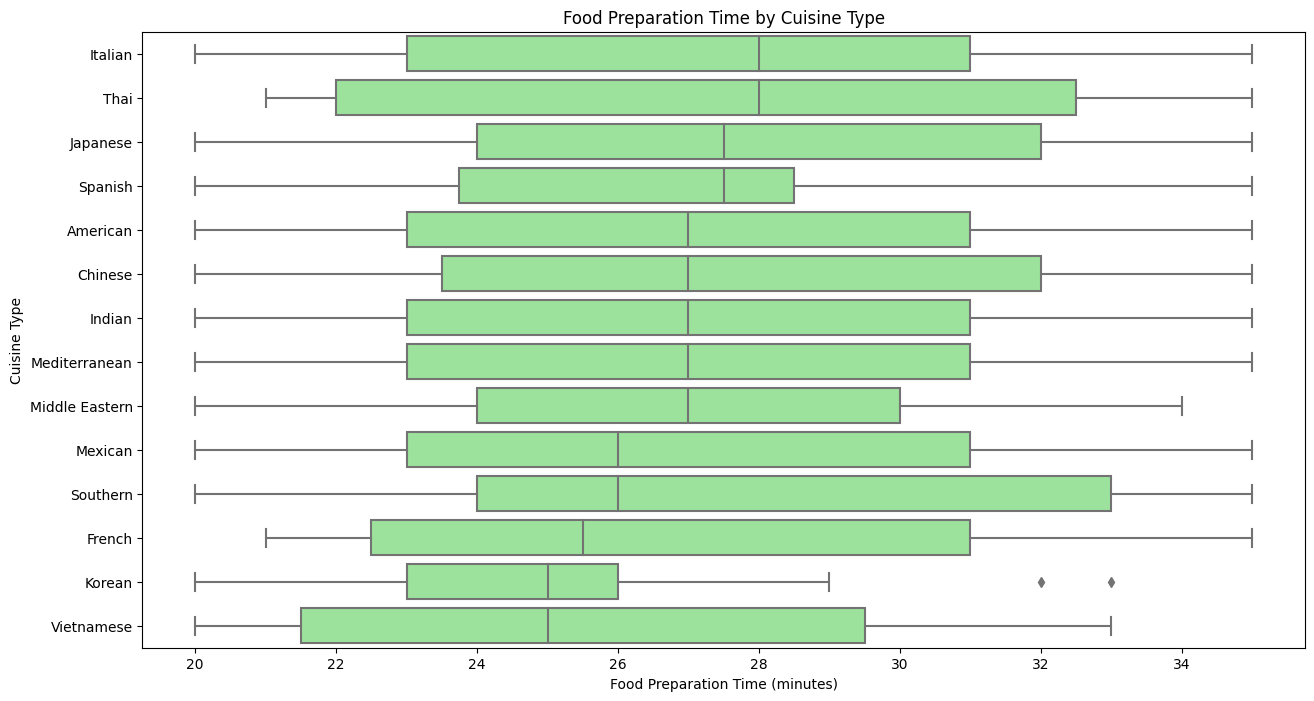

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create the box plot
sns.boxplot(data=df, y='cuisine_type', x='food_preparation_time',
            order=df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False).index, color='lightgreen')

# Set the title and axis labels
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cuisine Type')

# Display the plot
plt.show()

#### Observations:
*   The mean food preparation times are close, but the highest and lowest belong to the Southern (27.6) and Korean (25.5) cuisine types, respectively.
*   The minimum and maximum food preparation times are almost similar across cuisine types, except Korean, which has a relatively shorter maximum preparation time.


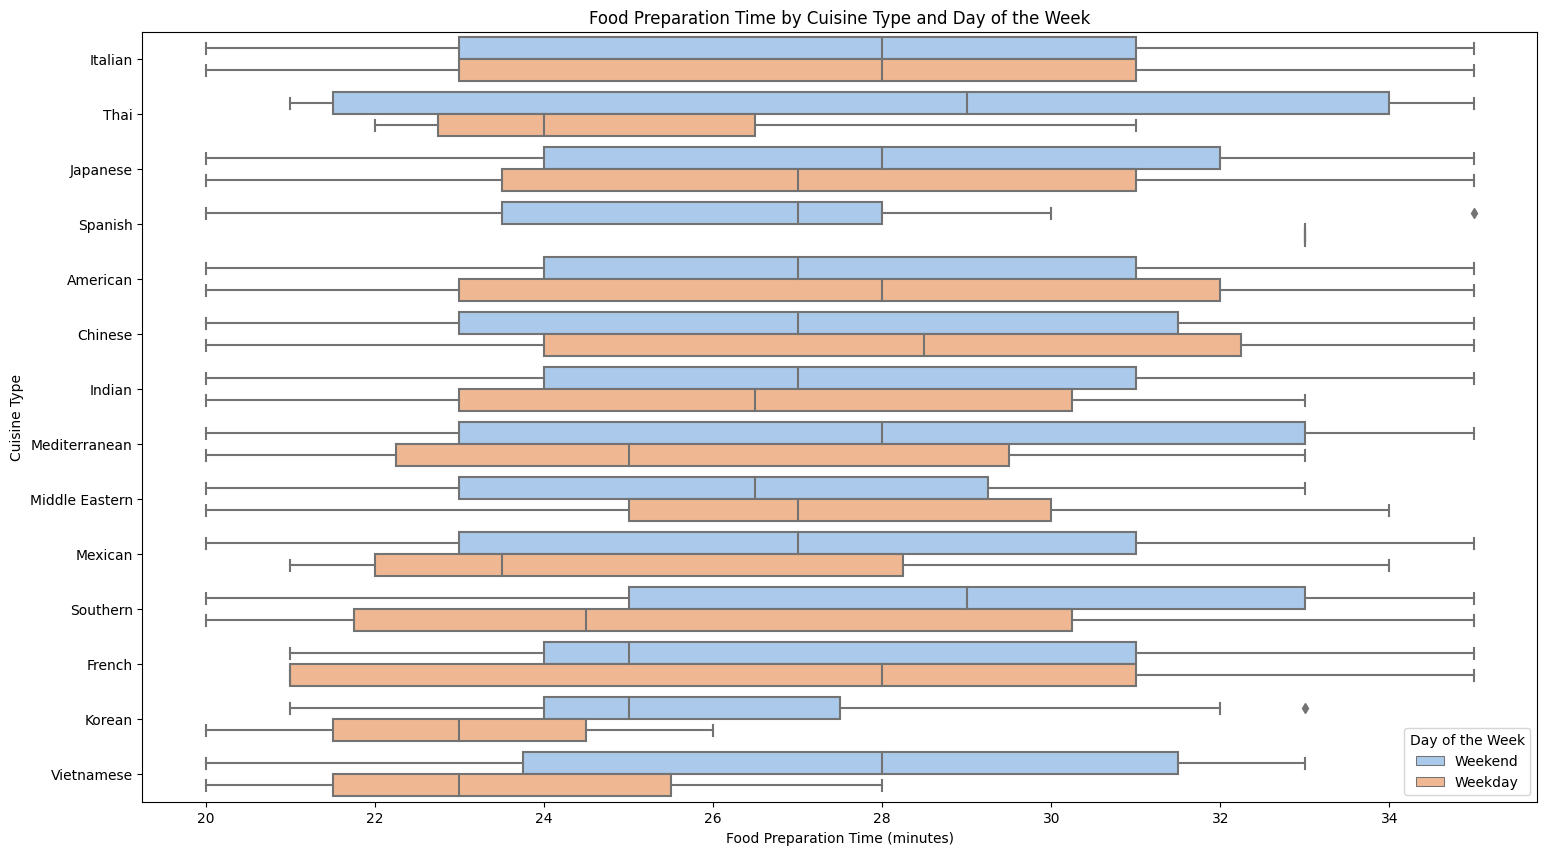

In [ ]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Create the box plot
sns.boxplot(data=df, y='cuisine_type', x='food_preparation_time', hue='day_of_the_week',
            order=df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False).index, palette='pastel')

# Set the title and axis labels
plt.title('Food Preparation Time by Cuisine Type and Day of the Week')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cuisine Type')
plt.legend(title='Day of the Week')

# Display the plot
plt.show()

#### Observations:
*   For most cuisines, there isn't a significant difference in preparation times between weekdays and weekends. However, cuisines like  Korean, Mediterranean, Mexican, Southern, Thai, and Vietnamese have considerable differences in preparation times at the weekend compared to weekdays.

### **Cuisine Type as it relates to the Ratings:**

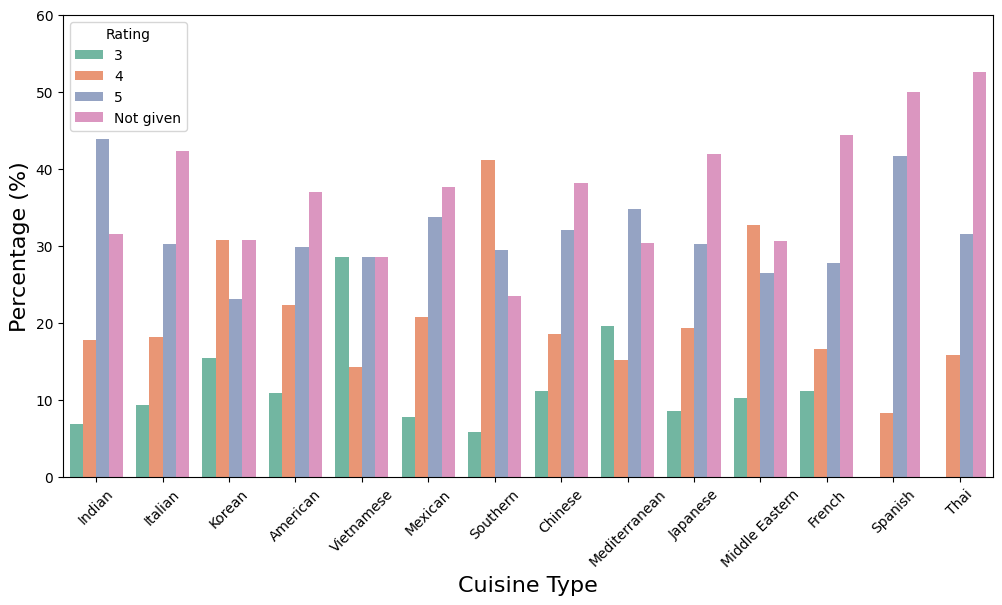

In [ ]:
# Use a barplot to compare distribution of different rating values given to orders with different cuisine types

# Create a DataFrame with percentage values for different ratings given to groups of cuisine types and sort them
cuisine_rating = df_cuisine.rating.value_counts(normalize = True).rename('percent').reset_index().sort_values('rating')

cuisine_rating.percent *= 100 # multiply 'percent' column by 100

# Set figure size
plt.figure(figsize = (12,6));

# Create a bar plot
sns.barplot(data = cuisine_rating, x = 'cuisine_type', y = 'percent', hue = 'rating', palette = 'Set2')

plt.xlabel('Cuisine Type', fontsize = 16);
plt.ylabel('Percentage (%)', fontsize = 16);
plt.xticks(rotation = 45)
plt.ylim([0,60])
plt.legend(title = 'Rating');

#### Observations:
*   Indian cuisine boasts the highest proportion of 5-star ratings.
*   Vietnamese cuisine has the most 3-star ratings by percentage.

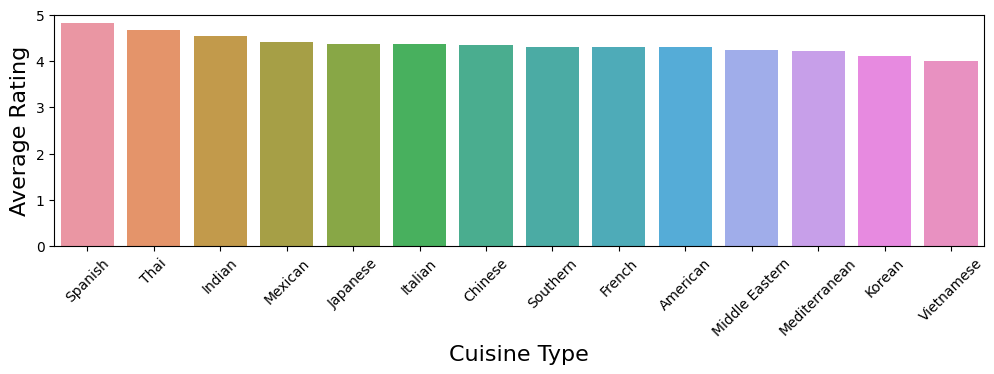

In [ ]:
# Examine mean rating of orders (excluding those with no rating) for each cuisine type using a bar plot

# Set figure size
plt.figure(figsize = (12,3))

# Use groupby() to group data based on Cuisine Type
# Use mean() to compute mean of ratings for each cuisine type category
# Use sort_values() to sort mean ratings
cuisine_mean_rating = df_numeric_rating.groupby('cuisine_type').rating.mean().sort_values(ascending = False)

# Create bar plot
sns.barplot(x = cuisine_mean_rating.index, y = cuisine_mean_rating, order = cuisine_mean_rating.index)

plt.ylabel('Average Rating', fontsize = 16);
plt.xlabel('Cuisine Type', fontsize = 16);
plt.xticks(rotation = 45)
plt.ylim([0,5]);

#### Observations:
*   Every cuisine type averages a rating of 4.0 or higher.
*   Spanish cuisine tops the ratings, while Vietnamese ranks lowest.

### **Cuisine Type as it relates to the Day of the Week:**

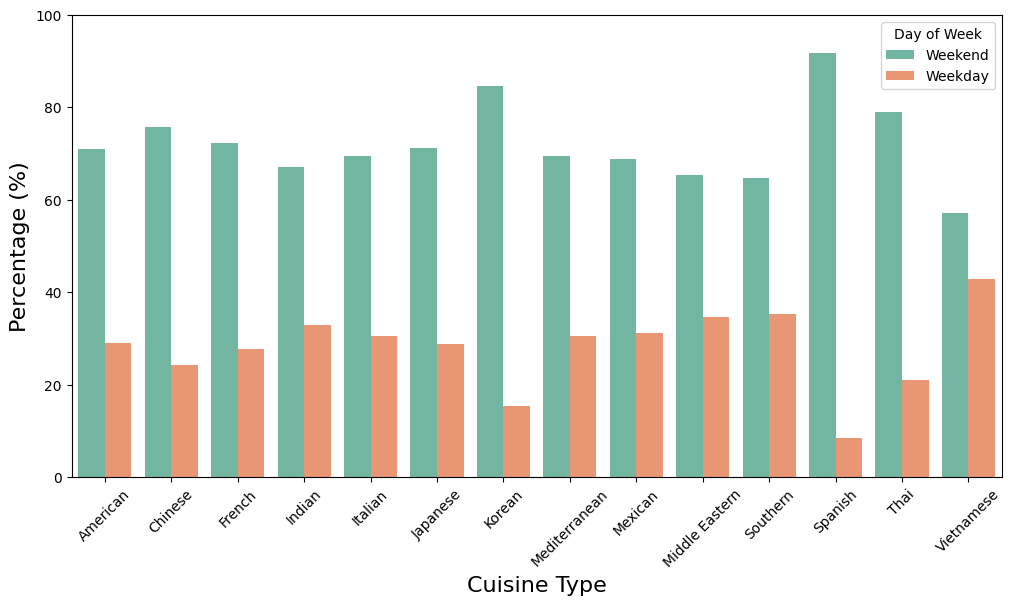

In [ ]:
# Use a barplot to check the percentage of orders for different cuisines on different days of week
cuisine_day = df_cuisine.day_of_the_week.value_counts(normalize = True).rename('percent').reset_index()

# Create a DataFrame with percentage values for different days of week and groups of cuisine types and reset their indices
cuisine_day.rename(columns = {'level_1' : 'day_of_the_week'}, inplace = True) # correct day_of_the_week column name

cuisine_day.percent *= 100 # multiply 'percent' column by 100

# Set figure size
plt.figure(figsize = (12,6));

# Create bar plot
sns.barplot(data = cuisine_day, x = 'cuisine_type', y = 'percent', hue = 'day_of_the_week', palette = 'Set2')

plt.xlabel('Cuisine Type', fontsize = 16);
plt.ylabel('Percentage (%)', fontsize = 16);
plt.xticks(rotation = 45)
plt.ylim([0,100])
plt.legend(title = 'Day of Week');

#### Observations:
*   Orders across all cuisines peak during weekends.
*   Spanish cuisine sees the most significant weekend-to-weekday order difference.
*   Vietnamese cuisine has the slightest variation in orders between weekends and weekdays.

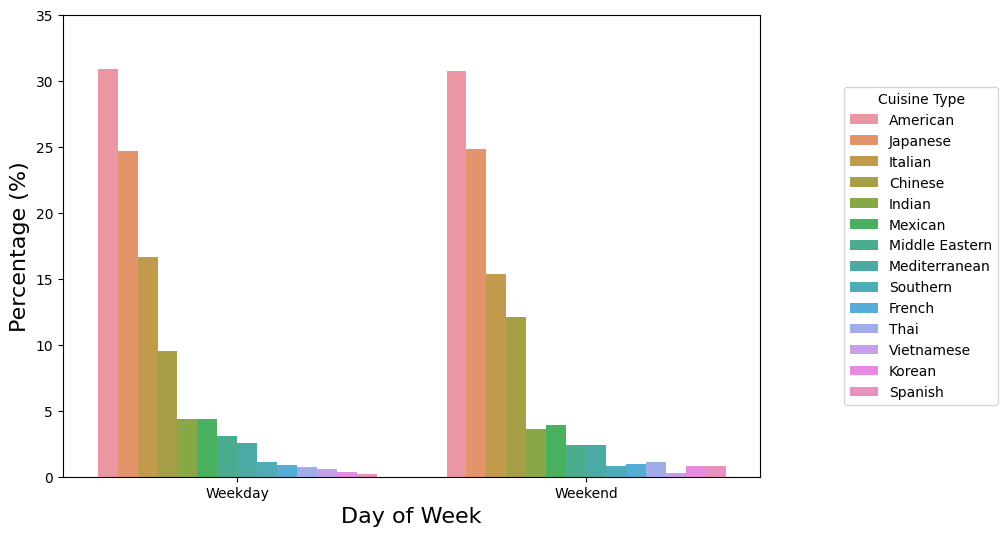

In [ ]:
# Use barplot to explore popularity of different cuisine types depending on day of week

# Use groupby() to group orders based on Day of the Week
df_day = df.groupby('day_of_the_week')

# Create a DataFrame with percentage values for different cusine types and groups of cuisine types and reset their indices
day_cuisine = df_day.cuisine_type.value_counts(normalize = True).rename('percent').reset_index()

# Correct cuisine_type column name
day_cuisine.rename(columns = {'level_1' : 'cuisine_type'}, inplace = True) # correct cuisine_type column name

day_cuisine.percent *= 100 # multiply 'percent' column by 100

# Set figure size
plt.figure(figsize = (9,6));

# Create bar plot
sns.barplot(data = day_cuisine, x = 'day_of_the_week', y = 'percent', hue = 'cuisine_type')

plt.xlabel('Day of Week', fontsize = 16);
plt.ylabel('Percentage (%)', fontsize = 16);
plt.ylim([0,35])
plt.legend(title = 'Cuisine Type', loc='center right', bbox_to_anchor=(1.35, 0.5));

#### Observations:
*   American cuisine leads in orders, regardless of the day.
*   Weekdays see fewer Spanish orders, while weekends have the least Vietnamese orders.
*   Day of the week barely affects cuisine order choices.

### **Day of the Week as it relates to the Unique Customers:**

In [ ]:
# Use nunique() to count unique values of Customer ID in different groups of week day
df_day.customer_id.nunique()

day_of_the_week
Weekday    466
Weekend    938
Name: customer_id, dtype: int64

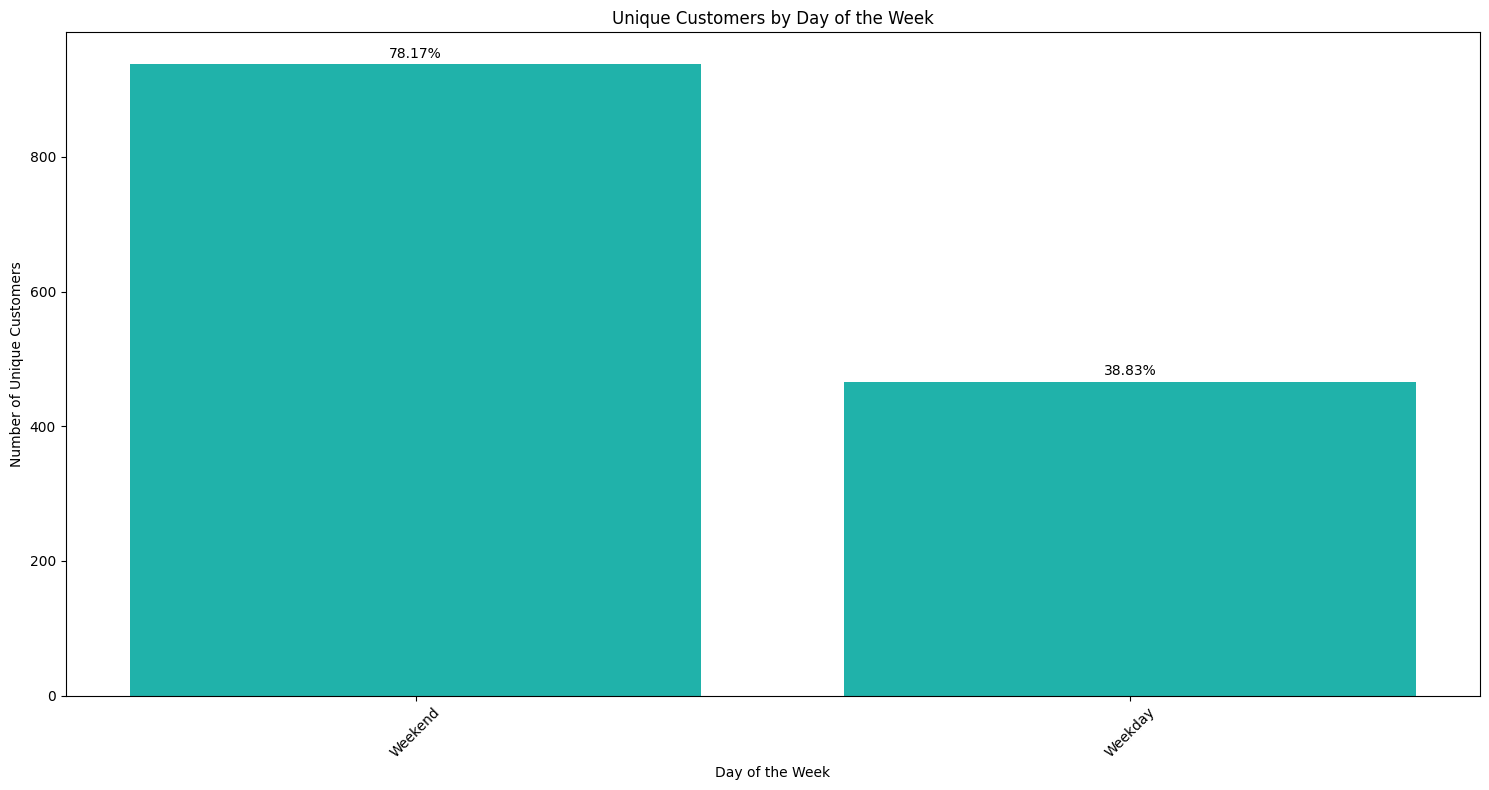

In [ ]:
# Grouping by day of the week and counting unique customers
unique_customers_by_day = df.groupby('day_of_the_week')['customer_id'].nunique().sort_values(ascending=False)

# Calculate the total number of unique customers
total_unique_customers = df['customer_id'].nunique()

# Plotting the data
plt.figure(figsize=(15, 8))
bars = plt.bar(unique_customers_by_day.index, unique_customers_by_day.values, color='lightseagreen')

# Adding percentage labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{(yval/total_unique_customers)*100:.2f}%', ha='center', va='bottom')

plt.title('Unique Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
*   Weekend customer counts more than doubles the weekday numbers.

### **Food Preparation Time as it relates to the Day of the Week:**

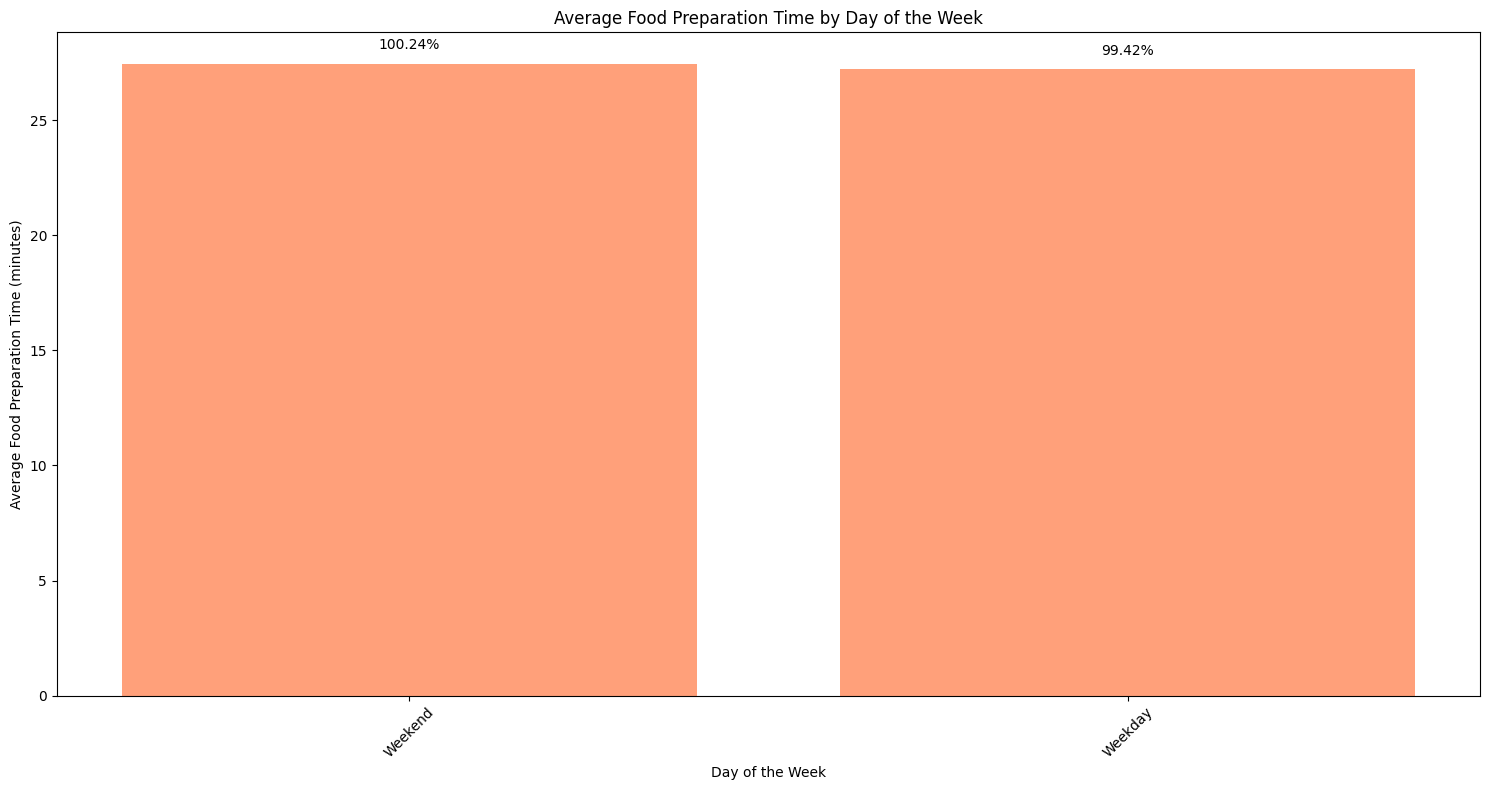

In [ ]:
# Grouping by day of the week and calculating average food preparation time
avg_prep_time_by_day = df.groupby('day_of_the_week')['food_preparation_time'].mean().sort_values(ascending=False)

# Calculate the overall average preparation time
overall_avg_prep_time = df['food_preparation_time'].mean()

# Plotting the data
plt.figure(figsize=(15, 8))
bars = plt.bar(avg_prep_time_by_day.index, avg_prep_time_by_day.values, color='lightsalmon')

# Adding percentage labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{(yval/overall_avg_prep_time)*100:.2f}%', ha='center', va='bottom')

plt.title('Average Food Preparation Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
*   The average food preparation time remains relatively consistent across all days of the week, with only slight variations.
*   There's a minor increase in preparation time on weekends, which could be attributed to higher order volumes or different menu offerings.


### **Food Preparation Time as it relates to the Ratings:**

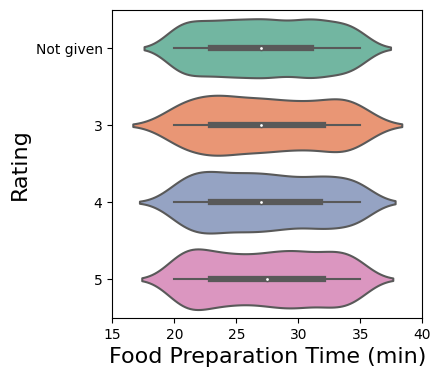

In [ ]:
# set figure size
plt.figure(figsize = (4,4));

# Create violin plot
sns.violinplot(data = df, y = 'rating', x = 'food_preparation_time', order = ['Not given','3','4','5'], palette = 'Set2')

plt.ylabel('Rating', fontsize = 16); # set y-axis label
plt.xlabel('Food Preparation Time (min)', fontsize = 16); # set x-axis label
plt.xlim([15,40]); # set y-axis limits

#### Observations:
*   Orders with a 5-star rating have a slightly shorter average preparation time compared to other ratings. This suggests that quicker preparation might lead to higher customer satisfaction.
*   Orders with a 3-star rating have the longest average preparation time. This could indicate that longer waits might contribute to lower ratings.


### **Delivery Time as it relates to the Day of the Week:**

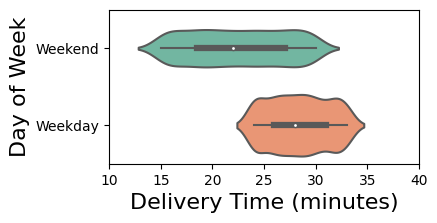

In [ ]:
# Set figure size
plt.figure(figsize = (4,2));

# Create violin plot
sns.violinplot(data = df, y = 'day_of_the_week', x = 'delivery_time', palette = 'Set2')

plt.xlabel('Delivery Time (minutes)', fontsize = 16);
plt.ylabel('Day of Week', fontsize = 16);
plt.xlim([10,40]);

#### Observations:
*   Delivery times are typically quicker on weekends compared to weekdays.
*   Weekend deliveries show greater time fluctuations than weekday ones.

### **Delivery Time as it relates to the Ratings:**

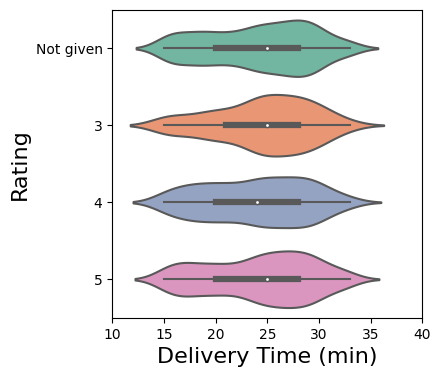

In [ ]:
# Set figure size
plt.figure(figsize = (4,4));

# Create violin plot
sns.violinplot(data = df, y = 'rating', x = 'delivery_time', order = ['Not given','3','4','5'], palette = 'Set2')

plt.ylabel('Rating', fontsize = 16); # set y-axis label
plt.xlabel('Delivery Time (min)', fontsize = 16); # set x-axis label
plt.xlim([10,40]); # set y-axis limits

#### Observations:
*   5-star rated orders have the shortest average delivery time, suggesting prompt deliveries increase customer satisfaction.
*   3-star rated orders have the longest average delivery time, indicating that delays might lead to lower ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert rating to a numerical with 'Not given' as null value
df['rating'] = np.where(df['rating']== 'Not given', np.nan ,df['rating']).astype(float)

# Use groupby restaurant name and check the count and the mean
rating_restaurant = df.groupby('restaurant_name')['rating'].agg(['count','mean'])

# Print restaurants that have a rating count of more than 50 and the average rating greater than 4
rating_restaurant.loc[(rating_restaurant['count'] > 50) & (rating_restaurant['mean'] > 4)]

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
*   'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', and 'The Meatball Shop' meet the promotional criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Create a function calculate revenu
def calculate_revenu(row):
        new_element = row['cost_of_the_order']
        if new_element > 20:
            val = new_element * 0.25
        elif new_element > 5:
            val = new_element * 0.15
        else:
            val = 0
        return val

# Apply function
df['revenu'] = df.apply(calculate_revenu,axis=1)

# Calculate the sum of the column and print the result
print("The net revenue generated on all the orders given in the dataset is {:.2f} ".format(df['revenu'].sum()))

The net revenue generated on all the orders given in the dataset is 6166.30 


#### Observations:
*   The dataset shows a total revenue of $6,166.30.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Select orders with 'total_time_delivery' > 60 and divided by total_orders and convert to %
# Create a new column total_time delivery
df['total_time_delivery'] = df['food_preparation_time']+df['delivery_time']
PRC_time_dlv_GT_60 = (df[df['total_time_delivery'] > 60].shape[0] / total_orders) * 100

print("The percentage of orders that have more than 60 minutes of total delivery time is {:.2f} %".format(PRC_time_dlv_GT_60))

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:
*   10.54% of orders experienced delivery times exceeding one hour.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#groupby day_of_the_week and check the mean of delivery_time
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
# Set figure size
plt.figure(figsize = (4,2));

# Create violin plot
sns.violinplot(data = df, y = 'day_of_the_week', x = 'delivery_time', palette = 'Set2')

plt.xlabel('Delivery Time (minutes)', fontsize = 16);
plt.ylabel('Day of Week', fontsize = 16);
plt.xlim([10,40]);

#### Observations:
*   Delivery times are typically quicker on weekends compared to weekdays.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The FoodHub dataset provides valuable insights into customer preferences and order patterns. By focusing on popular cuisines, optimizing delivery times, and encouraging customer feedback, FoodHub can enhance its services and increase customer satisfaction.
*  **Popular Cuisines:** American cuisine dominates the orders, indicating a strong preference among customers. This could be due to a wider variety of dishes or more restaurants offering this cuisine.
*  **Delivery Efficiency:** While the average delivery time is relatively consistent across the week, there's a slight increase during weekends, possibly due to higher order volumes or external factors like traffic.
*  **Ratings and Delivery:** A faster delivery time correlates with higher ratings, emphasizing the importance of prompt service in customer satisfaction. However, the overall rating distribution across different delivery times doesn't show significant variation, suggesting other factors also play a role in customer feedback.
*  **Weekend Surge:** There's a noticeable increase in the number of orders and unique customers during weekends. This could be attributed to more leisure time, family meals, or social gatherings.
*  **Restaurant Performance:** Restaurants like 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', and 'The Meatball Shop' have both high order counts and favorable ratings, making them prime candidates for promotional offers or partnerships.
*  **Preparation Time Insights:** While preparation time varies across cuisines, it doesn't show a strong correlation with the day of the week. This consistency suggests effective kitchen operations.
*  **Customer Feedback:** Most cuisines have an average rating of 4.0 or above, indicating overall satisfaction. However, there are variations, with Spanish cuisine receiving the highest average ratings and Vietnamese the lowest.

In summary, the dataset provides valuable insights into customer preferences, restaurant performance, and operational efficiencies. To enhance customer satisfaction and grow the business, it would be beneficial to focus on improving delivery times, especially during peak periods, and promoting top-performing restaurants. Additionally, understanding the factors behind the ratings of different cuisines can help in tailoring marketing strategies and improving the overall dining experience.

### Recommendations:
*  **Promote Top Performers:**
1.   Collaborate with restaurants like 'Blue Ribbon Fried Chicken', 'Blue Ribbon
Sushi', 'Shake Shack', and 'The Meatball Shop' for special promotions or loyalty programs, given their high order counts and favorable ratings.

*  **Promote Popular Cuisines:**
1.   Given the popularity of "American", "Japanese", and "Mexican" cuisines, FoodHub can consider promoting these cuisines during peak hours or offering special deals to attract more customers.

*  **Optimize Weekend Operations:**
1.   Since there's a surge in orders and unique customers during weekends, consider increasing delivery staff or partnering with third-party delivery services to handle the increased volume.
2.   Offer special weekend deals or combo offers to capitalize on the higher demand.

*  **Focus on Delivery Efficiency:**
1.   The majority of orders are delivered within 25 minutes. Ensuring consistent and timely delivery can enhance customer satisfaction.
2.   Implement real-time tracking and efficient route planning for delivery personnel to reduce delivery times, especially during peak hours or weekends.
3.   Consider offering incentives or bonuses to delivery staff for timely deliveries to motivate faster service.

*  **Feedback Mechanism:**
1.   A significant number of orders have "Not given" as their rating, almost 39%. Implementing a feedback system or incentivizing customers to leave reviews can provide valuable insights into areas of improvement.
2.   Establish a robust feedback mechanism to understand the reasons behind ratings, especially for cuisines or restaurants with lower average scores.
3.   Use this feedback to address specific issues, whether they relate to food quality, delivery, or overall service.

*  **Operational Efficiency:**
1.   Analyze peak order times and ensure adequate staffing during these hours. This can help in reducing both preparation and delivery times.
2.   Collaborate with restaurants to ensure they maintain optimal inventory, especially during weekends, to avoid order cancellations or delays.

*  **Diversify Cuisine Offerings:**
1.   While American cuisine is popular, introducing diverse cuisines or promoting underrepresented ones like Spanish or Vietnamese can cater to a broader audience and tap into niche markets.

By implementing these recommendations, the company can enhance customer satisfaction, optimize operations, and potentially increase its market share in the competitive food delivery industry.  

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Python_Foundations/Projects/PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python_Foundations/Projects/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 3106639 bytes to /content/drive/MyDrive/Python_Foundations/Projects/PYF_Project_LearnerNotebook_FullCode.html


---